1-PRE PROCESSING

In [1]:
# CICIDS2017 veri seti kullanılmaktadır.

## Bu programın amacı, CICIDS2017 verilerini içeren csv dosyalarını hatalardan temizlemektir.
## Hata düzeltmesinden sonra, tüm csv dosyaları tek bir dosyada yapıldı

import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

print("Bu süreç bilgisayarınızın performansına bağlı olarak 5 ila 10 dakika sürebilir.\n\n\n")
number="0123456789"
# CSV dosya adları:
csv_files = [
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
]
# Kolon basliklari:
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","faulty-Fwd Header Length","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]

main_labels2=main_labels
main_labels=( ",".join( i for i in main_labels ) )
main_labels=main_labels+"\n"
flag=True
for i in range(len(csv_files)):
    ths = open(str(i)+".csv", "w")
    ths.write(main_labels)

    # Her CSV dosyasını okuma ve ön işleme
    with open('VeriSeti/' + csv_files[i], 'r') as file:
        while True:
            try:
                line=file.readline()

                # CSV dosyalarının başlıklarını ve eksik satırları eleme
                if  line[0] in number:

                    # "–" karakterini "-" ile değiştirme
                    if " – " in str(line):
                        line=(str(line).replace(" – "," - "))

                    # "inf", "Infinity" ve "NaN" değerlerini sıfır ile değiştirme
                    line=(str(line).replace("inf","0"))
                    line=(str(line).replace("Infinity","0"))
                    line=(str(line).replace("NaN","0"))

                    ths.write(str(line))
                else:
                    continue
            except:
                break
    ths.close()

    # Veri çerçevesi oluşturma ve eksik değerleri sıfır ile doldurma
    df=pd.read_csv(str(i)+".csv",low_memory=False)
    df=df.fillna(0)

    string_features=["Flow Bytes/s","Flow Packets/s"]

    # "Flow Bytes/s" ve "Flow Packets/s" kolonlarındaki sayısal olmayan verileri düzeltme
    for ii in string_features:
        df[ii]=df[ii].replace('Infinity', -1)
        df[ii]=df[ii].replace('NaN', 0)
        number_or_not=[]
        for iii in df[ii]:
            try:
                k=int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii]=number_or_not

    string_features=[]

    # Sayısal olmayan (string ve/veya kategorik) özellikleri tespit etme
    for j in main_labels2:
        if df[j].dtype=="object":
            string_features.append(j)

    # "Label" kolonunu listeden çıkarma
    # Çünkü farklı makine öğrenimi yaklaşımıyla kullanmak için "kategorik" kalması gerekiyor.
    try:
        string_features.remove('Label')
    except:
        print("error!")

    labelencoder_X = preprocessing.LabelEncoder()

    # Sayısal olmayan özellikleri sayısala çevirme
    for ii in string_features:
        try:
            df[ii]=labelencoder_X.fit_transform(df[ii])
        except:
            df[ii]=df[ii].replace('Infinity', -1)

    # Gereksiz kolonu silme (61. kolon)
    df=df.drop(main_labels2[61], axis=1)

    # Tüm CSV dosyalarını tek bir dosyada birleştirme
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")
    os.remove(str(i)+".csv")
    print(csv_files[i], " dosyasının ön işleme aşaması tamamlandı.\n")


print("Görev tamamlandı!")
print("Toplam işlem süresi: = ",time.time()- seconds ,"seconds")

Bu süreç bilgisayarınızın performansına bağlı olarak 5 ila 10 dakika sürebilir.



Monday-WorkingHours.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Tuesday-WorkingHours.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Wednesday-workingHours.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Friday-WorkingHours-Morning.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Görev tamamlandı!
Toplam işlem süresi: =  321.754328250885 seconds


2-STATISTICS

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack - Brute Force         1507
Web Attack - XSS                  652
Infiltration                       36
Web Attack - Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


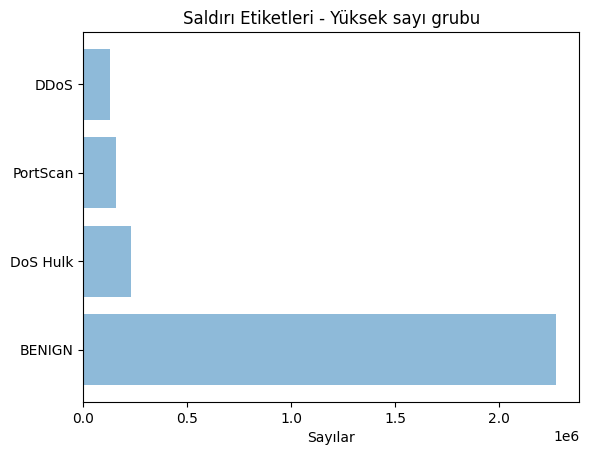

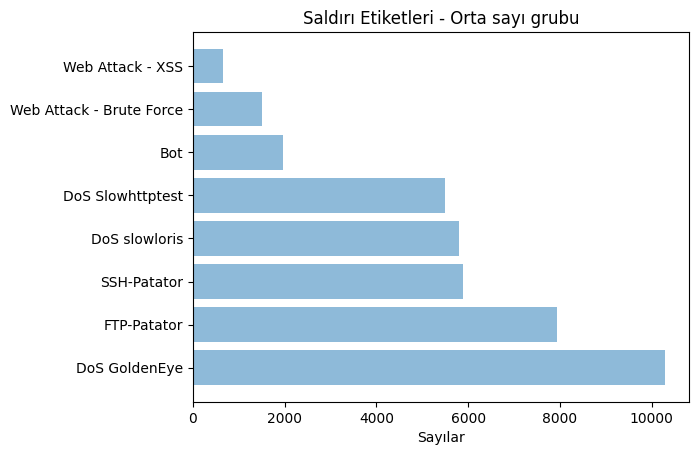

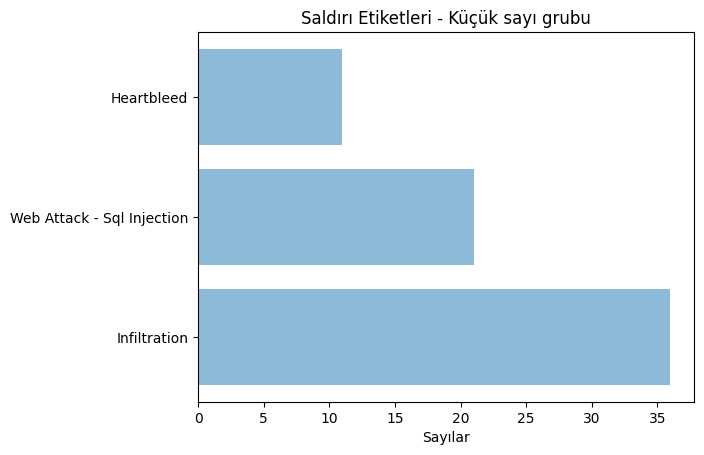

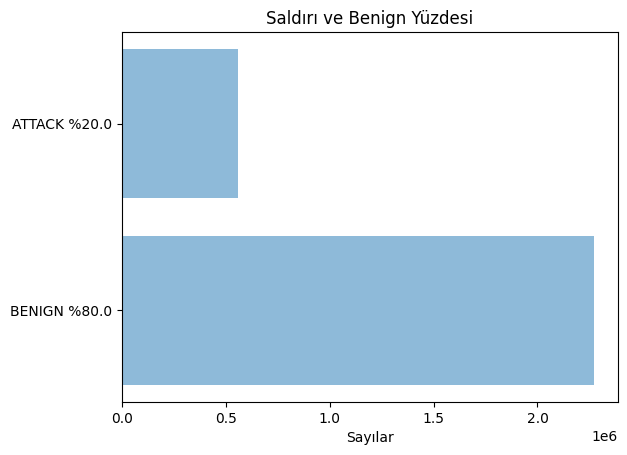

Görev Tamamlandı!
Toplam İşlem Süresi: =  15.988181114196777 saniye


In [2]:
# programın çalışması için all_data.csv dosyası gereklidir.
# all_data.csv dosyası program ile aynı dizinde bulunmalıdır.

# bu programın amacı, veri kümesinde yer alan veriler hakkında istatistikler sağlamaktır.
# bazı verilerin çok büyük, bazılarının ise çok küçük olması göz önüne alındığında, grafikler tüm verilerin görülebilmesi için üç ayrı grupta oluşturulmuştur:
#          büyük: 11000'den fazla sayı içeren etiketler
#          orta: 600 ile 11000 arasında sayı içeren etiketler
#          küçük: 600'den az sayı içeren etiketler

# son grafiklerde, tüm saldırıların ve normal davranışların oranları verilmiştir.

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  grafik oluşturma fonksiyonu
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()


df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())


key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attacak=0
benign=0

## Bu bölümde, saldırılar 3 grup altında toplanmıştır,
## böylece tüm değerler grafikte görülebilir.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i])
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attacak+=values[i]

key =[benign,attacak]


# Grafik oluşturma fonksiyonları çağrılır
labels=["BENIGN %"+str(round(benign/(benign+attacak),2)*100),
        "ATTACK %"+str(round(attacak/(benign+attacak),2)*100)]
graph(big_labels,big_values,"Sayılar","Saldırı Etiketleri - Yüksek sayı grubu")
graph(medium_labels,medium_values,"Sayılar","Saldırı Etiketleri - Orta sayı grubu")
graph(small_labels,small_values,"Sayılar","Saldırı Etiketleri - Küçük sayı grubu")
graph(labels,key,"Sayılar","Saldırı ve Benign Yüzdesi")


print("Görev Tamamlandı!")
print("Toplam İşlem Süresi: = ",time.time()- seconds ,"saniye")

3-ATTACK FILTER

In [1]:
##  Bu programın amacı yalnızca bir tür saldırı ve normal akıştan oluşan CSV dosyaları oluşturmaktır.
##  Bu dosyalar, tüm saldırı akışlarını ve bazı normal veri akışlarını içerir. Oran: (saldırı= %30, normal=%70)
##  Normal veri akışları rastgele seçilir.

import random
import os
import pandas as pd
import time
seconds = time.time()
%matplotlib inline

def folder(f_name): # Bu fonksiyon program dizininde "attacks" adlı bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Klasör oluşturulamadı!")


print("Bu işlem, bilgisayarınızın performansına bağlı olarak 3 ila 8 dakika sürebilir.\n\n\n")

# Sütun başlıkları
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]
main_labels=( ",".join( i for i in main_labels ) )

attacks=["BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack – Brute Force", "Web Attack – Sql Injection", "Web Attack – XSS"]
folder("./attacks/")

benign=2359289

dict_attack={
"Bot":1966,
"DDoS":41835,
"DoS GoldenEye":10293,
"DoS Hulk":231073,
"DoS Slowhttptest":5499,
"DoS slowloris":5796,
"FTP-Patator":7938,
"Heartbleed":11,
"Infiltration":36,
"PortScan":158930,
"SSH-Patator":5897,
"Web Attack - Brute Force":1507,
"Web Attack - XSS":652,
"Web Attack - Sql Injection":21}


for i in dict_attack: # Bu bölümde her saldırı türü için bir dosya açılır ve rastgele bir normal akış kaydedilir.
    a,b=0,0
    ths = open("./attacks/"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(benign/(dict_attack[i]*(7/3)))
    with open("all_data.csv", "r") as file:
        while True:
            try:
                line=file.readline()
                line=line[:-1]
                k=line.split(",")
                if k[83]=="BENIGN":
                    rnd=random.randint(1,benign_num)
                    if rnd==1:
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[83]==i:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue
            except:
                break
    ths.close()
    print(i ,"dosyası tamamlandı\n saldırı:%d\n normal:%d\n\n\n " %(a,b))


## Tüm web saldırı dosyaları tek bir dosyada birleştirilir.
webs=["Web Attack - Brute Force","Web Attack - XSS","Web Attack - Sql Injection"]
flag=True
for i in webs:
    df=pd.read_csv("./attacks/"+str(i)+".csv")
    if flag:
        df.to_csv('./attacks/Web Attack.csv' ,index = False)
        flag=False
    else:
        df.to_csv('./attacks/Web Attack.csv' ,index = False,header=False,mode="a")
    os.remove("./attacks/"+str(i)+".csv")

print("Görev tamamlandı!")
print("İşlem süresi: = ",time.time()- seconds ,"saniye")


Bu işlem, bilgisayarınızın performansına bağlı olarak 3 ila 8 dakika sürebilir.



Bot dosyası tamamlandı
 saldırı:1966
 normal:4453


 
DDoS dosyası tamamlandı
 saldırı:128027
 normal:94582


 
DoS GoldenEye dosyası tamamlandı
 saldırı:10293
 normal:23302


 
DoS Hulk dosyası tamamlandı
 saldırı:231073
 normal:567401


 
DoS Slowhttptest dosyası tamamlandı
 saldırı:5499
 normal:12454


 
DoS slowloris dosyası tamamlandı
 saldırı:5796
 normal:13040


 
FTP-Patator dosyası tamamlandı
 saldırı:7938
 normal:17693


 
Heartbleed dosyası tamamlandı
 saldırı:11
 normal:37


 
Infiltration dosyası tamamlandı
 saldırı:36
 normal:82


 
PortScan dosyası tamamlandı
 saldırı:158930
 normal:377596


 
SSH-Patator dosyası tamamlandı
 saldırı:5897
 normal:13192


 
Web Attack - Brute Force dosyası tamamlandı
 saldırı:1507
 normal:3439


 
Web Attack - XSS dosyası tamamlandı
 saldırı:652
 normal:1437


 
Web Attack - Sql Injection dosyası tamamlandı
 saldırı:21
 normal:46


 
Görev tamamlandı!
İşlem 

4.1-saldıri_dosyalari_icin_ozellik_secimi

In [1]:
## programın çalışması için "saldırılar" klasörü (saldırı csv dosyalarıyla birlikte) gereklidir.
## "saldırılar" klasörü programla aynı dizinde bulunmalıdır.

## bu kodun amacı, makine öğrenimi aşamasında hangi özelliklerin kullanılacağını belirlemektir.
## bu amaçla saldırıların önem ağırlıkları hesaplanır.
## bu hesaplama sklearn-RandomForestRegressor kullanılarak yapıldı.

## hesaplama ve grafikleme için kullanılan bazı kod parçaları aşağıdaki siteden alınmıştır.
##  http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): # bu fonksiyon program dizininde "feature_pics" adında bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Klasör oluşturulamadı!")


# CSV files names:
csv_files=os.listdir("./attacks")# "attacks" klasöründeki dosya isimlerinin bir listesini oluşturur.

# Sütunların başlıkları
main_labels=["Flow Duration","Total Fwd Packets", "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_for_attack_files.csv", "w")
folder("./feature_pics/")
for j in csv_files:
    df=pd.read_csv("./attacks/"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:# makine öğrenimi algoritmasında kullanmak için normal etiketi "1", saldırı etiketi "0" olarak değiştirilir
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values

    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0


    # özellik önem derecelerinin hesaplanması
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    # özellik önem derecelerinin yazdırılması
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break
    print(j[0:-4],"önem listesi:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Saldırı - Özellik Önemi")
    plt.ylabel('Önem')
    plt.savefig("./feature_pics/"+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    # plt.show()
    plt.close()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")


print("Görev tamamlandı!")
print("Toplam işlem süresi: =", time.time()-seconds ,"saniye")
ths.close()

Bot önem listesi:
Bot 
                              importance
Features                               
Bwd Packet Length Mean         0.325371
Flow IAT Min                   0.009514
Flow Duration                  0.009149
Flow IAT Max                   0.009125
Flow IAT Std                   0.004445
Flow IAT Mean                  0.002786
Flow Packets/s                 0.001388
Flow Bytes/s                   0.001310
Fwd IAT Total                  0.001066
Total Length of Fwd Packets    0.000906
Bwd Packet Length Max          0.000496
Total Length of Bwd Packets    0.000358
Total Backward Packets         0.000317
Bwd Packet Length Std          0.000207
Total Fwd Packets              0.000194
Fwd Packet Length Mean         0.000135
Fwd Packet Length Max          0.000062
Fwd Packet Length Std          0.000055
Bwd Packet Length Min          0.000040
Fwd Packet Length Min          0.000017 



Bot=["Bwd Packet Length Mean","Flow IAT Min","Flow Duration","Flow IAT Max","Flow IAT Std"]


4.2-all_data_icin_ozellik_secimi

all_data önem listesi:
all_data 
                              importance
Features                               
Bwd Packet Length Std          0.377609
Flow IAT Min                   0.012895
Fwd Packet Length Std          0.009703
Flow IAT Std                   0.003860
Total Length of Bwd Packets    0.002583
Flow Bytes/s                   0.001223
Bwd Packet Length Max          0.000765
Total Length of Fwd Packets    0.000755
Flow Duration                  0.000745
Flow IAT Mean                  0.000663
Fwd IAT Total                  0.000645
Fwd Packet Length Min          0.000541
Fwd Packet Length Mean         0.000410
Flow IAT Max                   0.000300
Flow Packets/s                 0.000243
Total Backward Packets         0.000210
Bwd Packet Length Mean         0.000154
Fwd Packet Length Max          0.000151
Total Fwd Packets              0.000088
Bwd Packet Length Min          0.000065 



all_data=["Bwd Packet Length Std","Flow IAT Min","Fwd Packet Length Std","Flow IAT

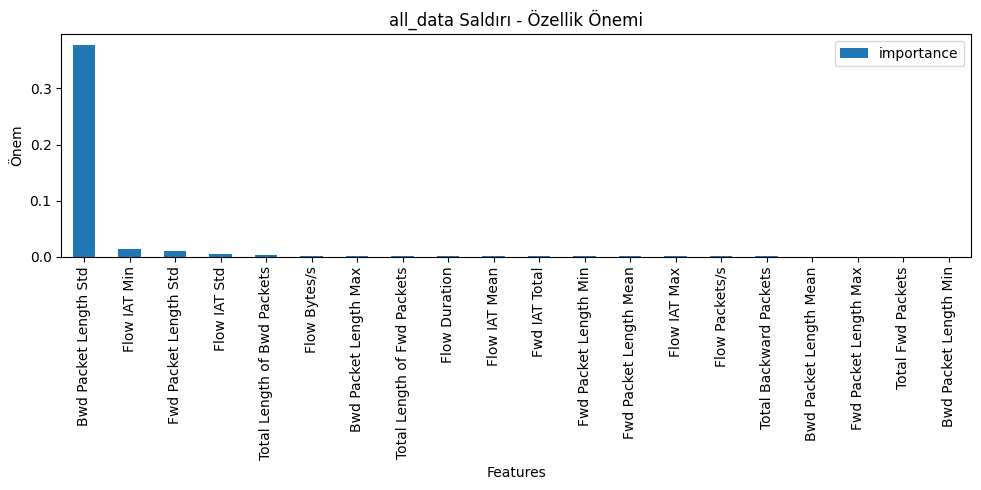

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
import sklearn as sk
import time

seconds = time.time()

def folder(f_name): # Bu fonksiyon program dizininde "feature_pics" adlı bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

# CSV dosyalarının isimleri:
csv_files = ["all_data.csv"] # "attacks" klasöründeki dosya isimlerinden bir liste oluşturur.

# Sütun başlıkları
main_labels = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
   "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std",
   "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max",
   "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
   "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std",
   "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count",
   "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes",
   "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd",
   "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min",
   "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"]

ths = open("importance_list_all_data.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    df = pd.read_csv(j, usecols=main_labels)
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]: # Makine öğrenme algoritmasında kullanmak için normal etiketi "1", saldırı etiketi "0" olarak değiştirilir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values

    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0

    # Özellik önemlerinin hesaplanması
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250, random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    # Özellik önemlerinin yazdırılması
    count = 0
    fea_ture = j[0:-4] + "=["
    for i in impor_bars.index:
        fea_ture = fea_ture + "\"" + str(i) + "\","
        count += 1
        if count == 5:
            fea_ture = fea_ture[0:-1] + "]"
            break
    print(j[0:-4], "önem listesi:")
    print(j[0:-4], "\n", impor_bars.head(20), "\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4] + " Saldırı - Özellik Önemi")
    plt.ylabel('Önem')
    plt.savefig("./feaure_pics/" + j[0:-4] + ".pdf", bbox_inches='tight', format='pdf')
    ths.write((fea_ture))
    plt.tight_layout()
    # plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print("görev tamamlandı!")
print("Toplam işlem süresi: = ", (time.time() - seconds) / 60, "dakika")
ths.close()

5.1-Saldırı Dosyaları İçin Makine Öğrenimi Uygulaması

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.52            0.69            0.66            0.52            0.0253         
Bot               Random Forest      0.95            0.94            0.94            0.94            0.088          
Bot               ID3                0.94            0.94            0.93            0.93            0.0387         
Bot               MLP                0.7             0.65            0.61            0.6             0.7295         
Bot               Nearest Neighbors  0.95            0.94            0.95            0.94            0.2796         


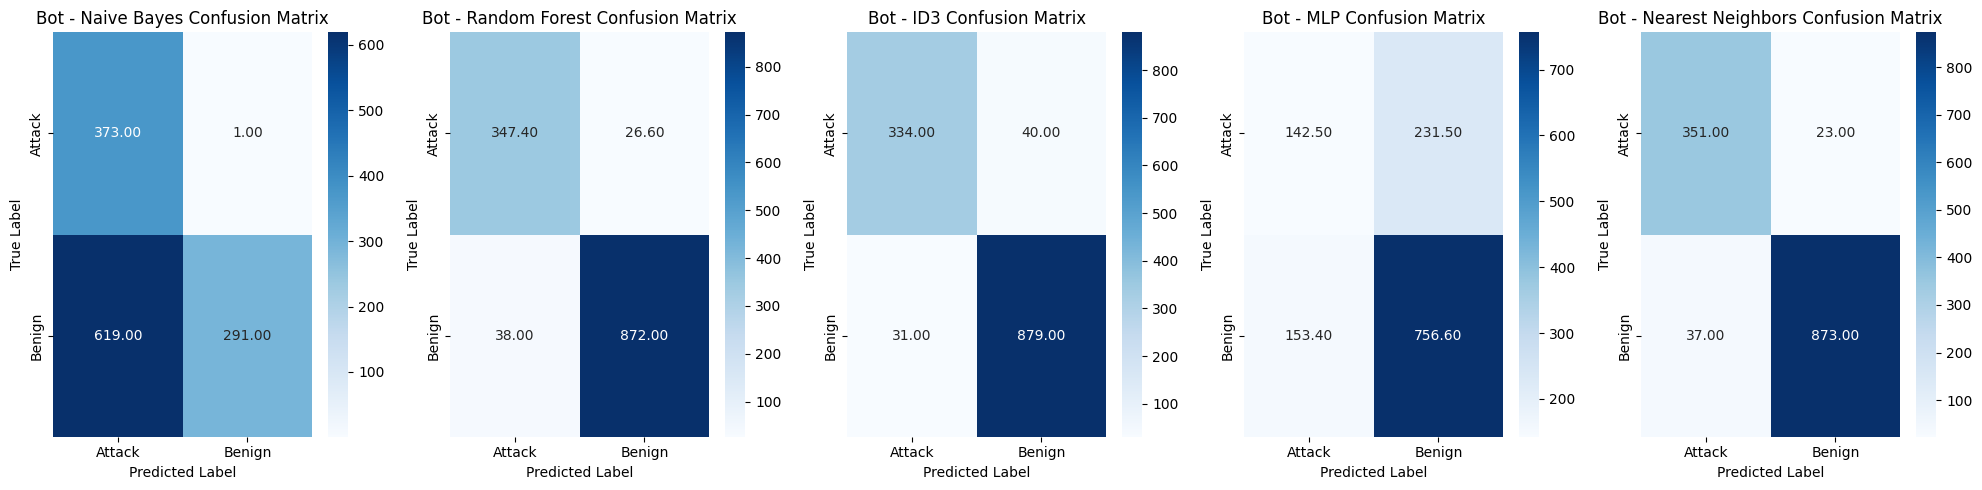

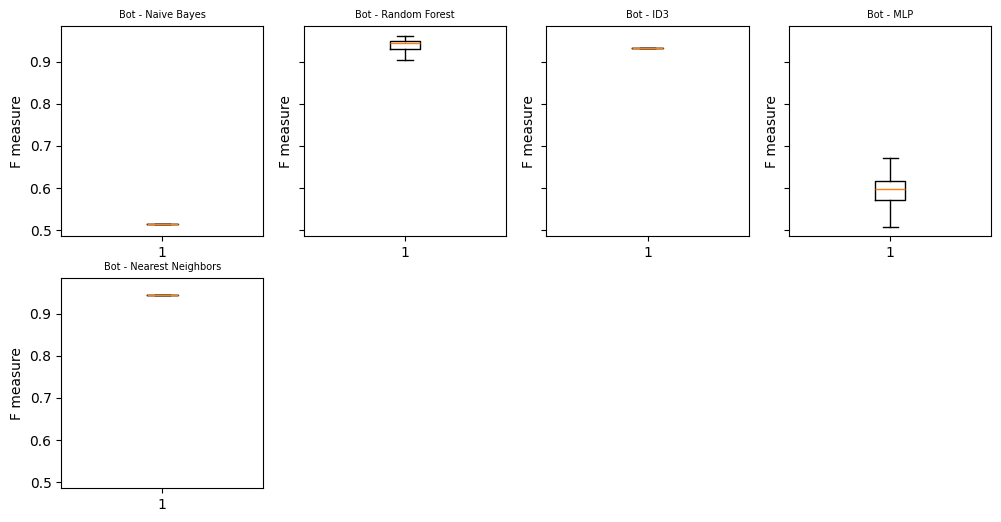


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.75            0.78            0.77            0.75            0.2135         
DDoS              Random Forest      0.99            0.99            0.99            0.99            2.0695         
DDoS              ID3                0.99            0.99            0.99            0.99            0.9711         
DDoS              MLP                0.77            0.84            0.75            0.74            41.3297        
DDoS              Nearest Neighbors  0.95            0.95            0.95            0.95            72.383         


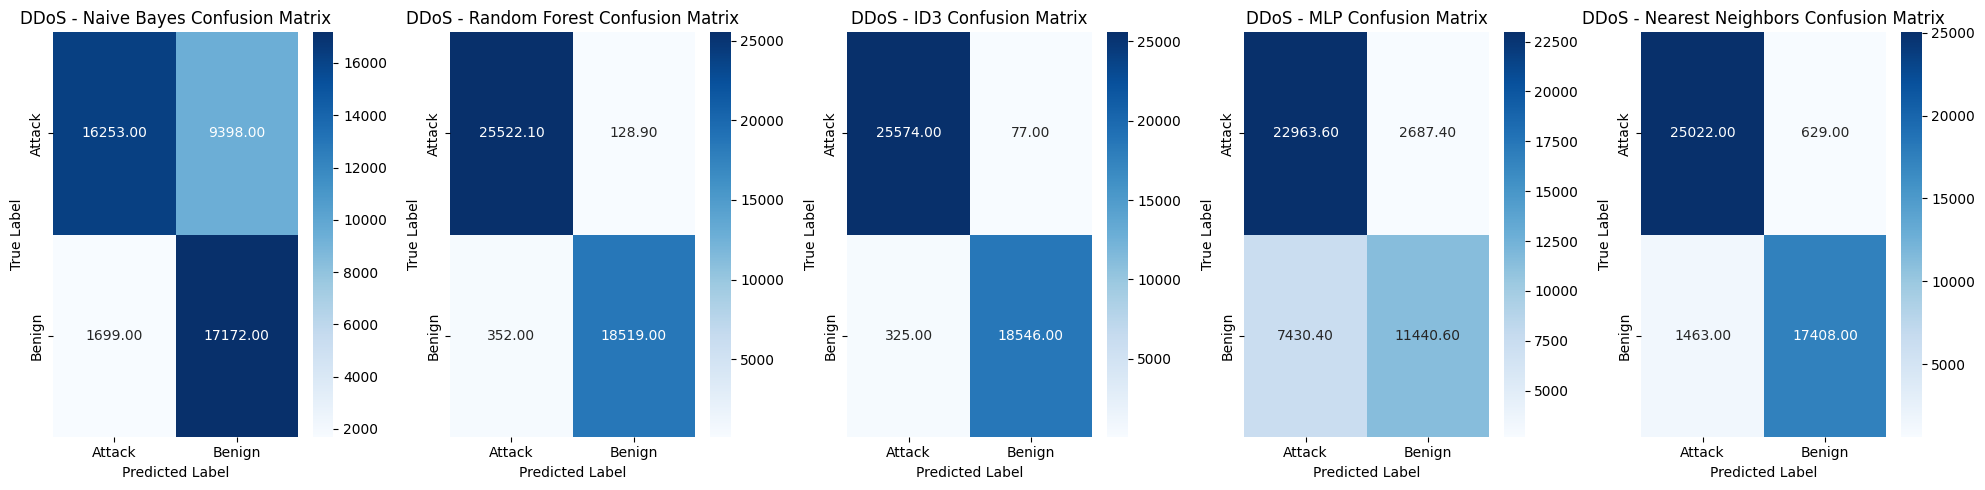

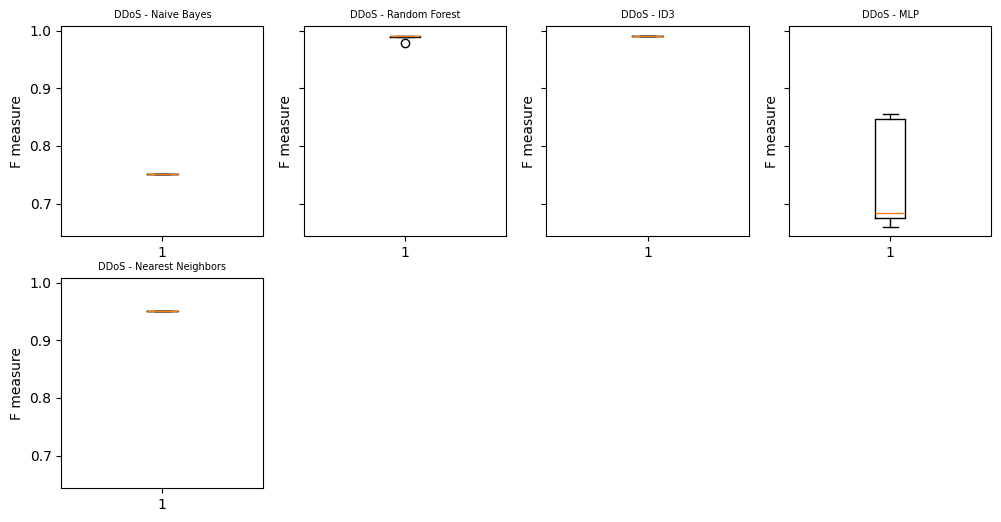


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.86            0.87            0.8             0.82            0.0427         
DoS GoldenEye     Random Forest      0.99            0.99            0.99            0.99            0.2387         
DoS GoldenEye     ID3                0.99            0.99            0.98            0.99            0.1154         
DoS GoldenEye     MLP                0.77            0.78            0.76            0.73            10.2932        
DoS GoldenEye     Nearest Neighbors  0.98            0.98            0.98            0.98            1.3171         


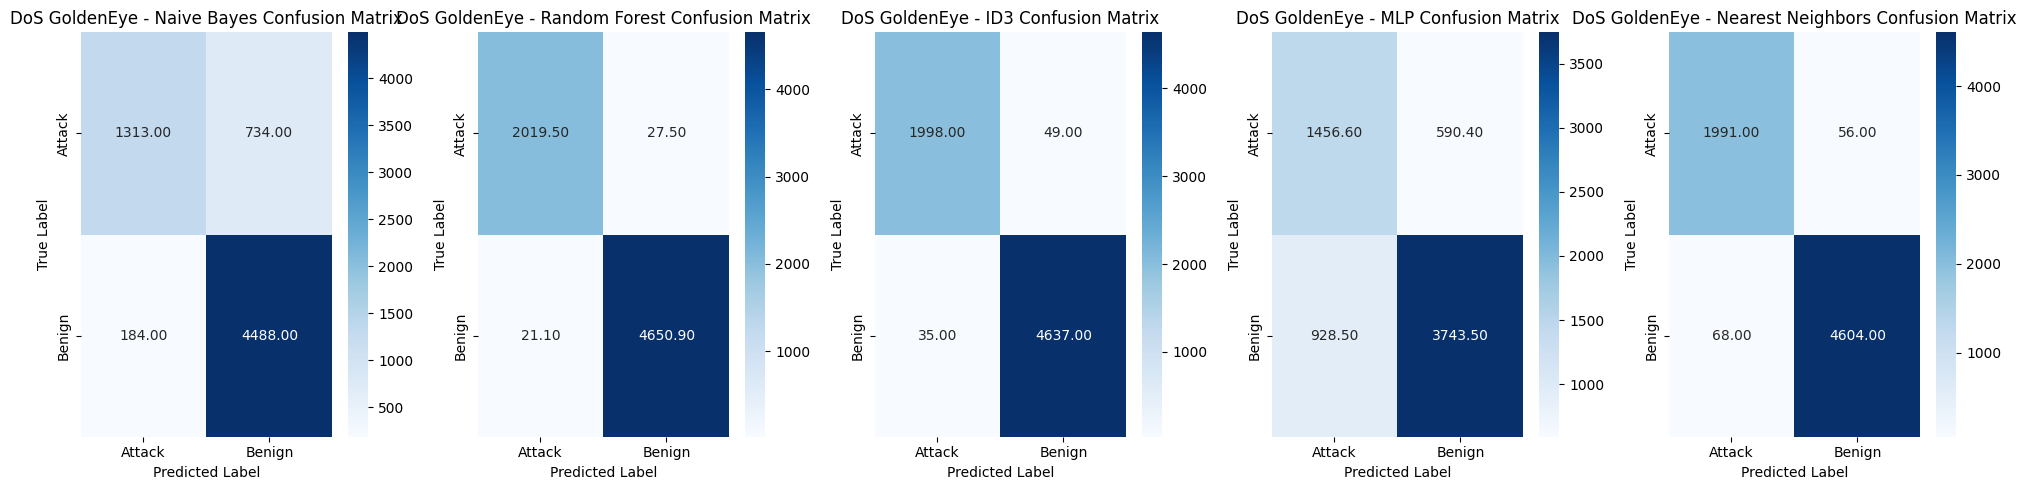

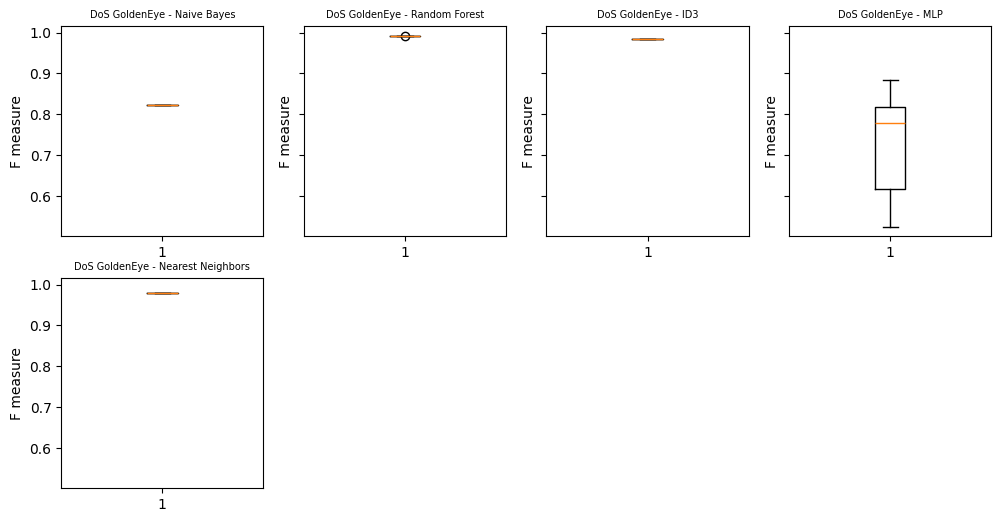


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.35            0.65            0.54            0.31            0.7149         
DoS Hulk          Random Forest      0.92            0.94            0.87            0.9             6.2575         
DoS Hulk          ID3                0.96            0.94            0.95            0.95            2.2868         
DoS Hulk          MLP                0.95            0.94            0.94            0.94            393.4627       
DoS Hulk          Nearest Neighbors  0.95            0.94            0.93            0.94            53.4401        


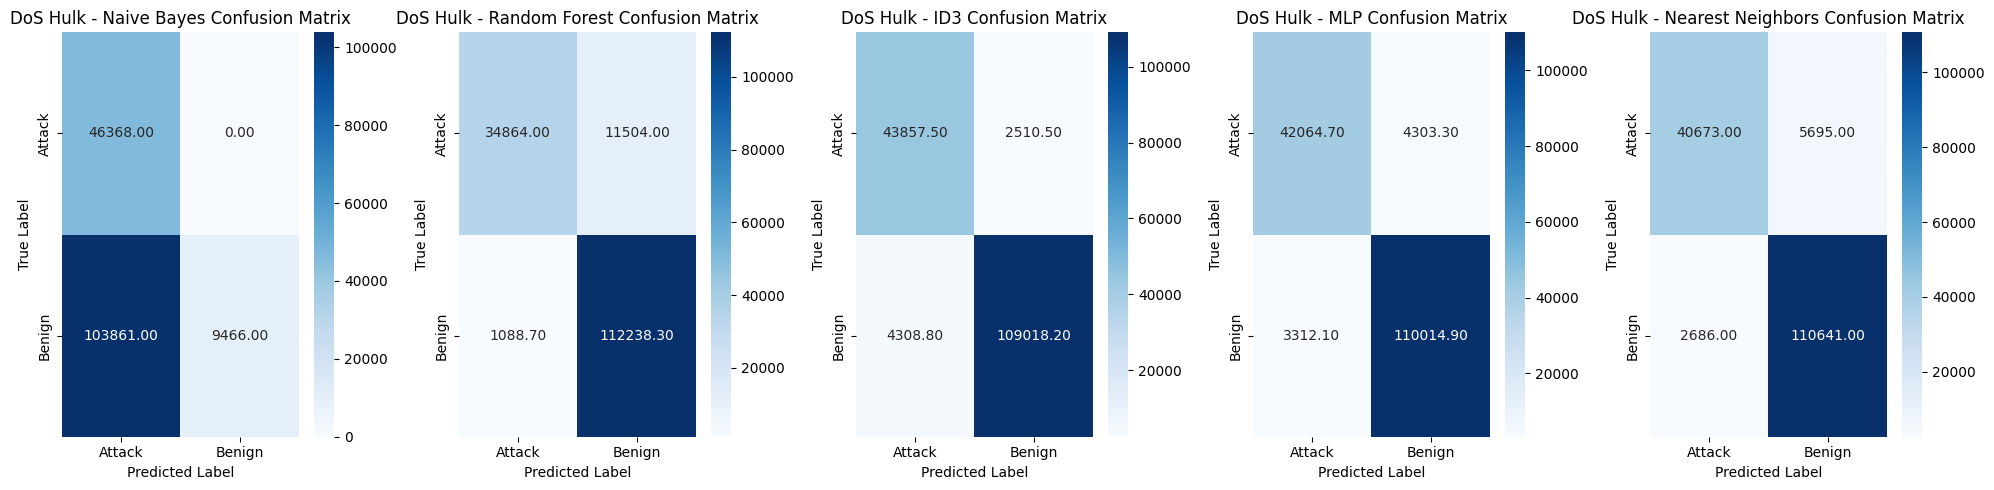

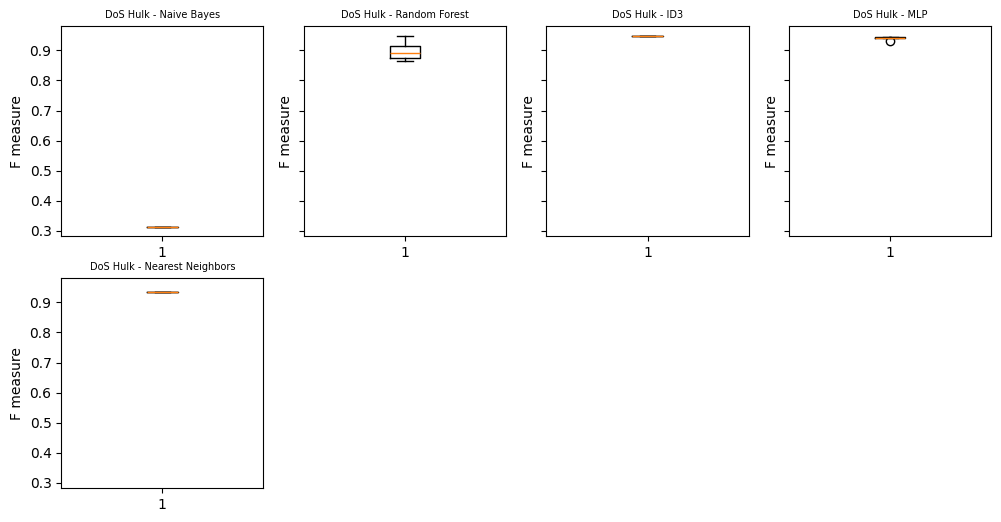


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.41            0.6             0.55            0.39            0.0154         
DoS Slowhttptest  Random Forest      0.98            0.99            0.98            0.98            0.0592         
DoS Slowhttptest  ID3                0.98            0.98            0.97            0.98            0.0268         
DoS Slowhttptest  MLP                0.78            0.81            0.73            0.68            1.5478         
DoS Slowhttptest  Nearest Neighbors  0.99            0.98            0.99            0.99            0.3054         


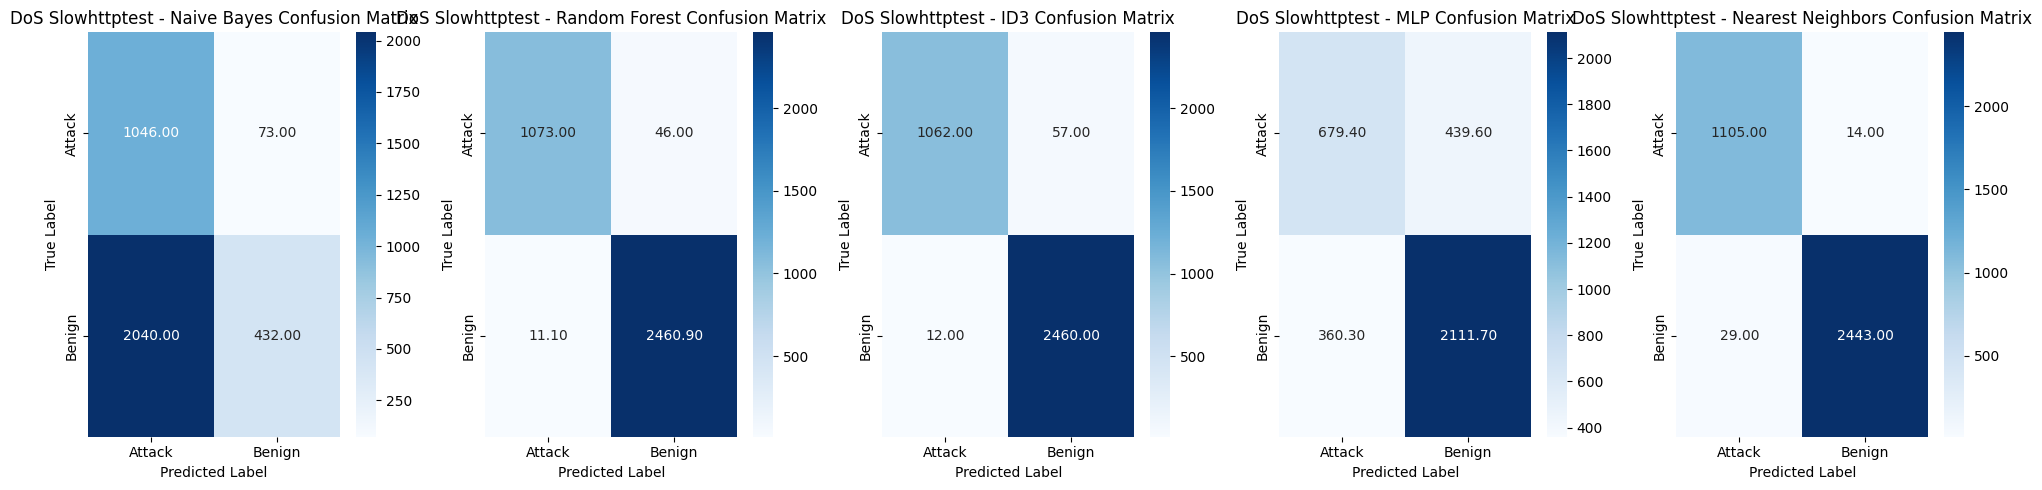

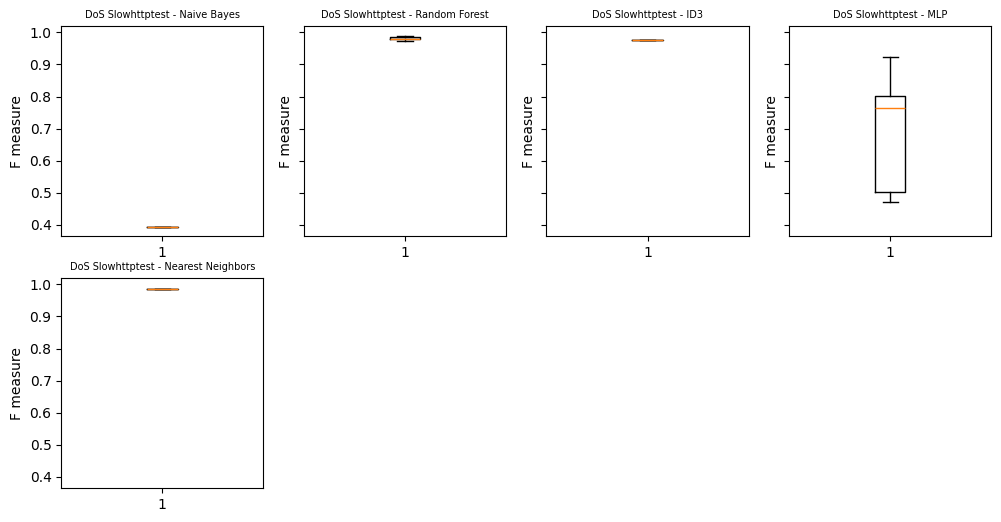


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.42            0.67            0.58            0.4             0.013          
DoS slowloris     Random Forest      0.96            0.95            0.94            0.95            0.0601         
DoS slowloris     ID3                0.97            0.97            0.95            0.96            0.0264         
DoS slowloris     MLP                0.81            0.79            0.83            0.8             1.3822         
DoS slowloris     Nearest Neighbors  0.95            0.95            0.94            0.95            0.2801         


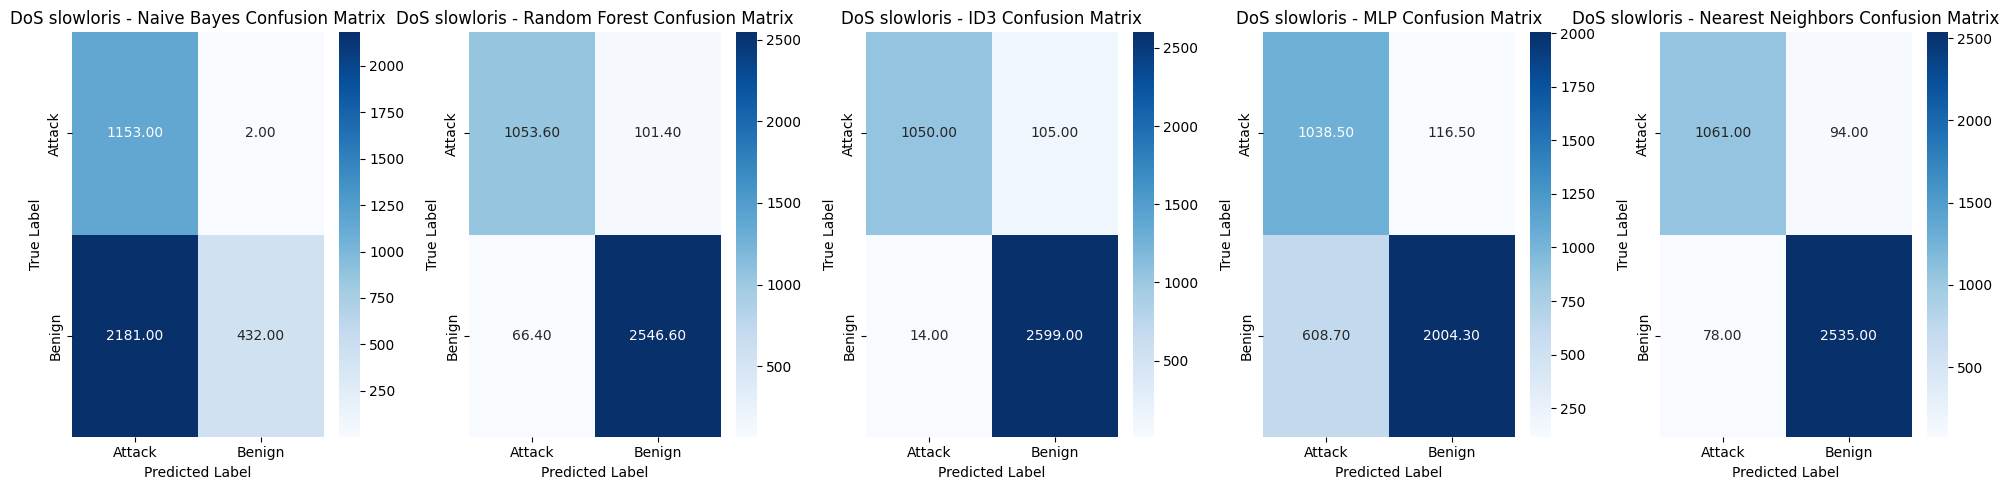

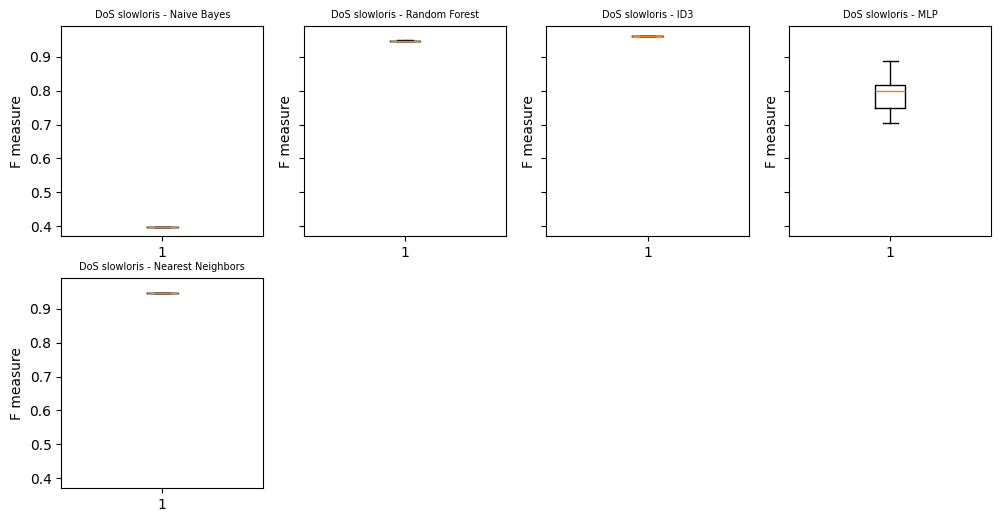


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        1.0             1.0             1.0             1.0             0.0152         
FTP-Patator       Random Forest      1.0             1.0             1.0             1.0             0.0609         
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.0208         
FTP-Patator       MLP                1.0             1.0             1.0             1.0             3.2607         
FTP-Patator       Nearest Neighbors  1.0             1.0             1.0             1.0             0.5339         


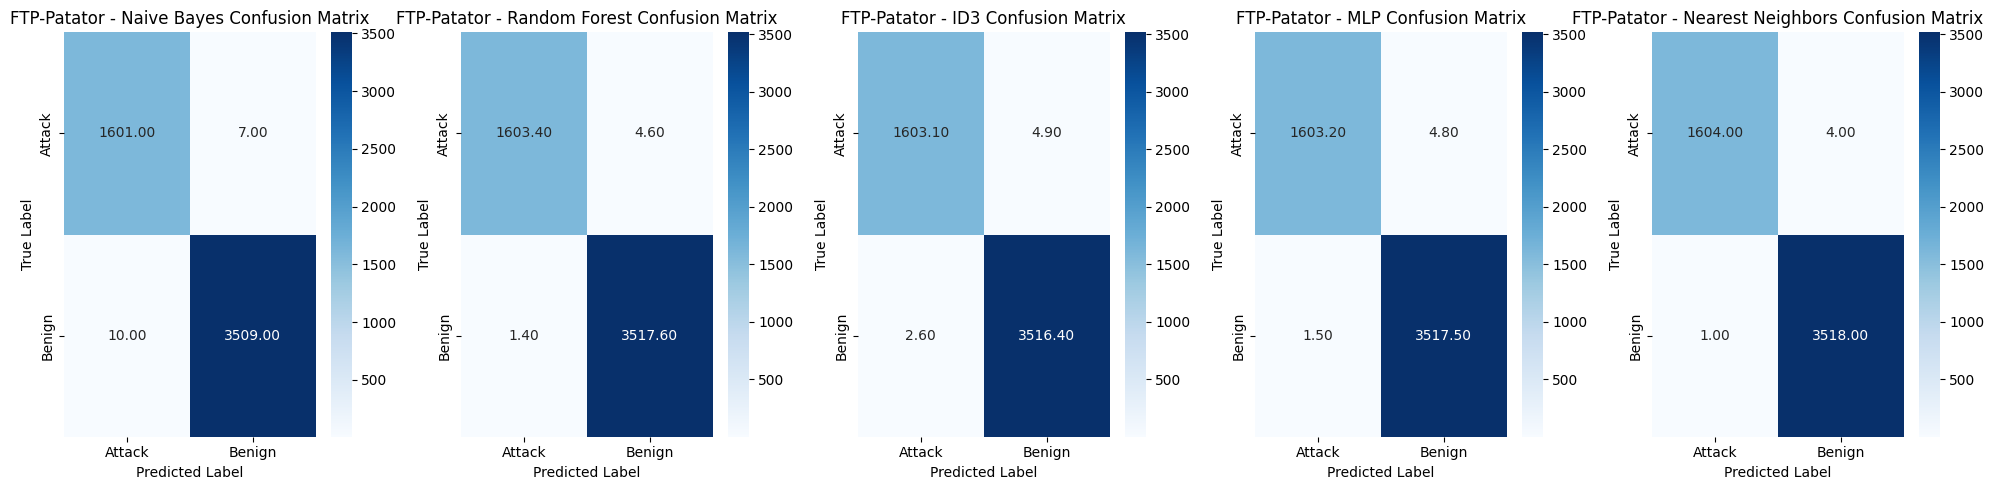

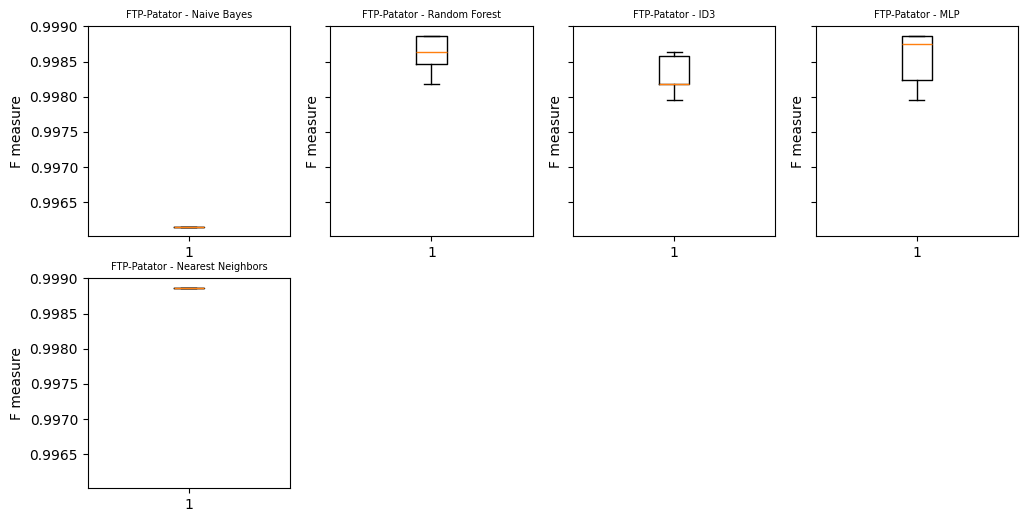


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0086         
Heartbleed        Random Forest      1.0             1.0             1.0             1.0             0.0254         
Heartbleed        ID3                1.0             1.0             1.0             1.0             0.0103         
Heartbleed        MLP                0.68            0.55            0.61            0.51            0.0357         
Heartbleed        Nearest Neighbors  1.0             1.0             1.0             1.0             0.011          


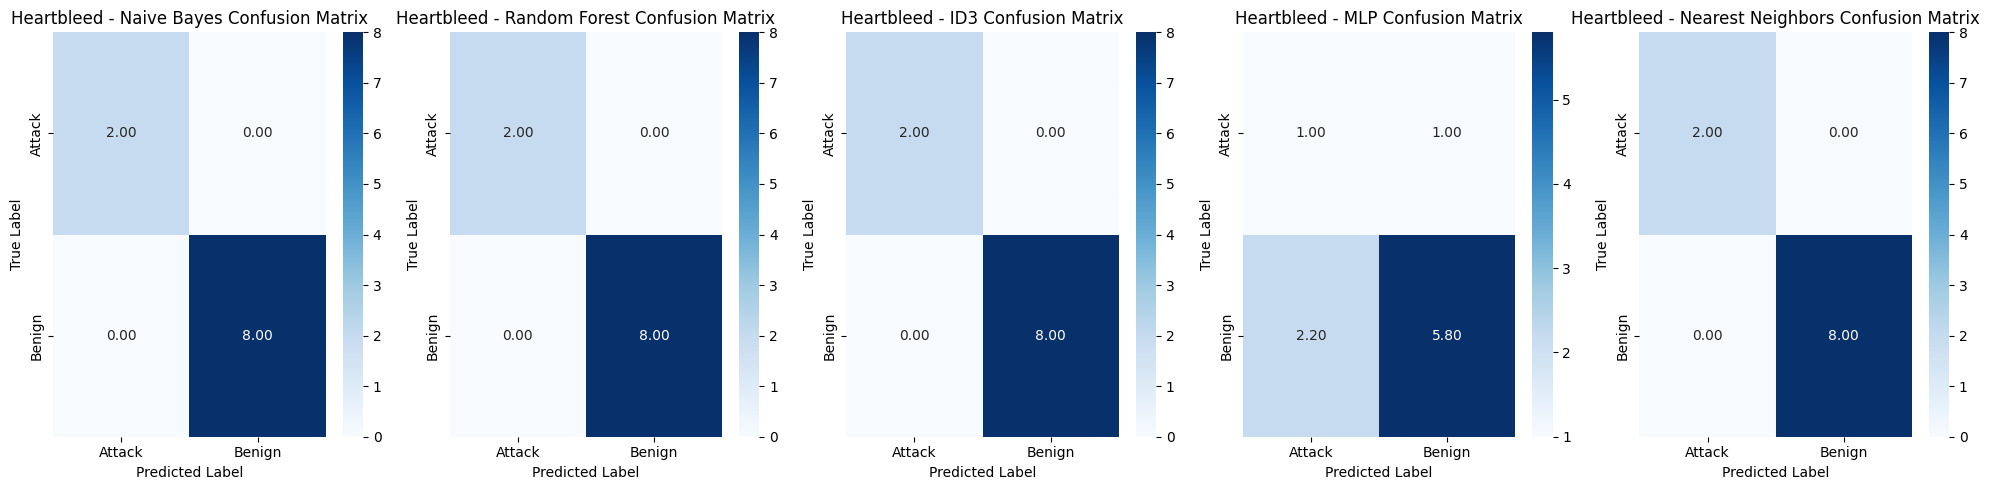

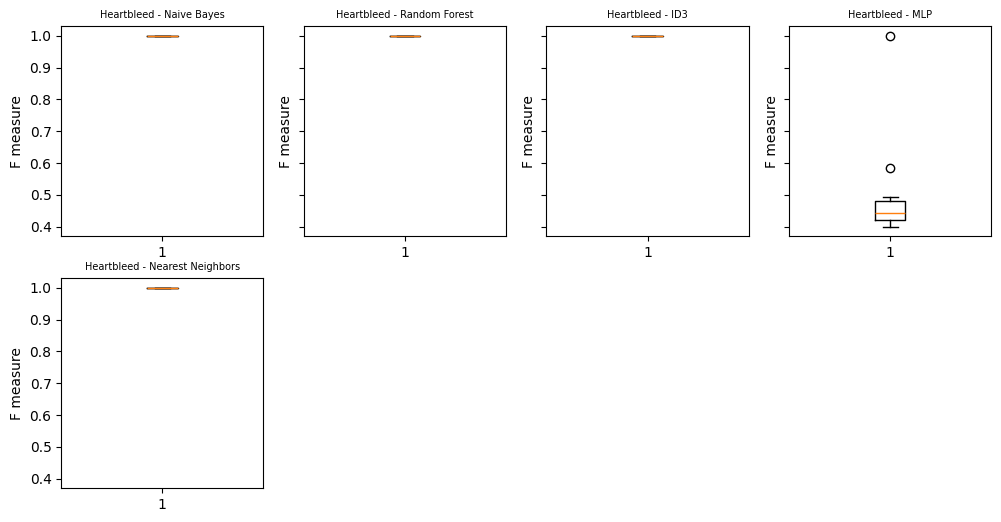


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Infiltration      Naive Bayes        0.79            0.89            0.58            0.58            0.0085         
Infiltration      Random Forest      0.86            0.81            0.85            0.83            0.0202         
Infiltration      ID3                0.86            0.81            0.88            0.83            0.008          
Infiltration      MLP                0.46            0.52            0.59            0.41            0.0304         
Infiltration      Nearest Neighbors  0.96            0.93            0.97            0.95            0.0112         


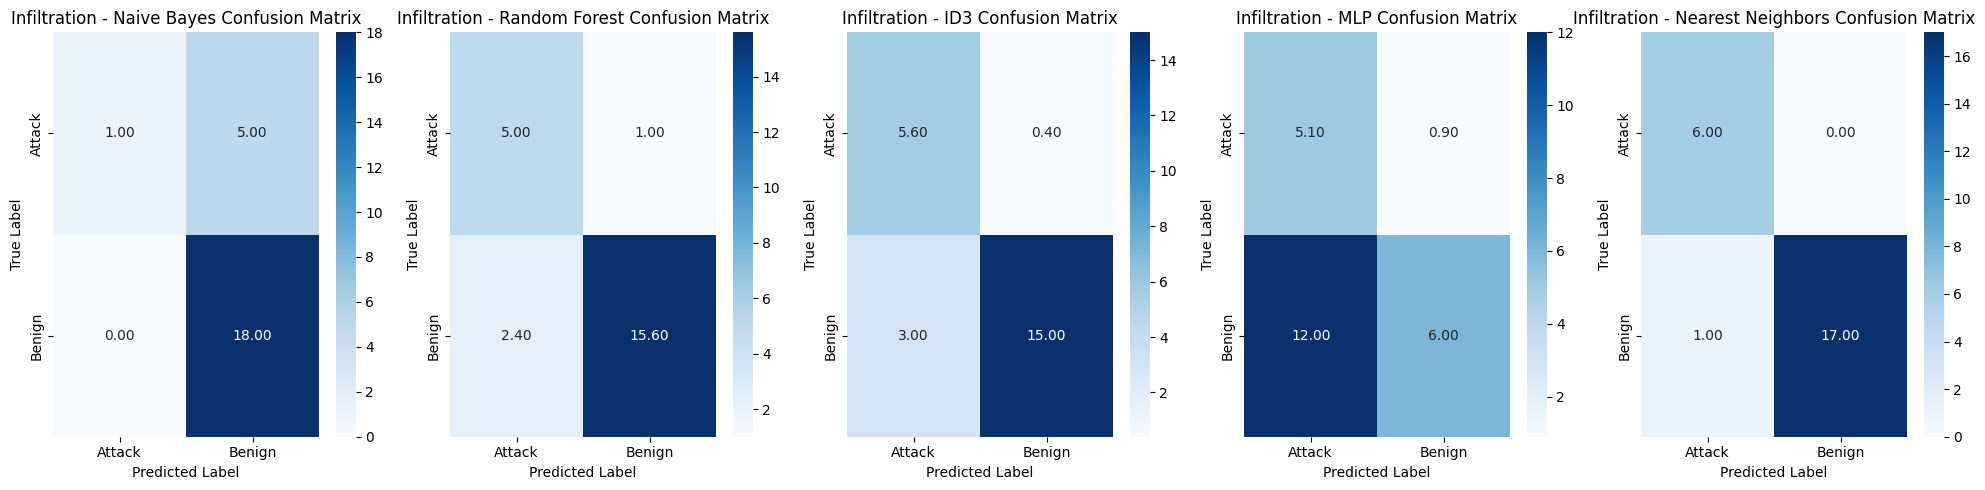

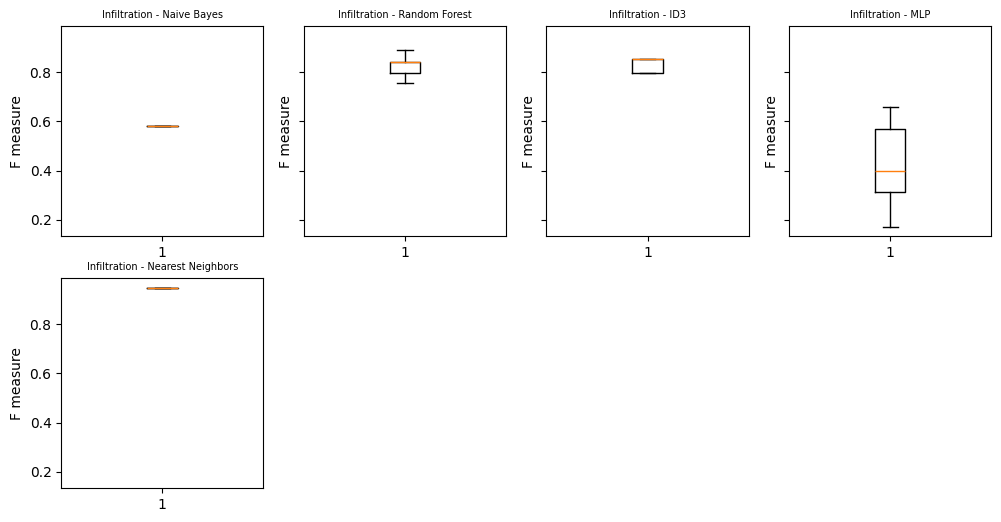


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.44            0.66            0.6             0.43            0.2747         
PortScan          Random Forest      1.0             1.0             1.0             1.0             2.9242         
PortScan          ID3                1.0             1.0             1.0             1.0             0.9897         
PortScan          MLP                0.71            0.64            0.53            0.45            23.7848        
PortScan          Nearest Neighbors  1.0             1.0             1.0             1.0             17.2968        


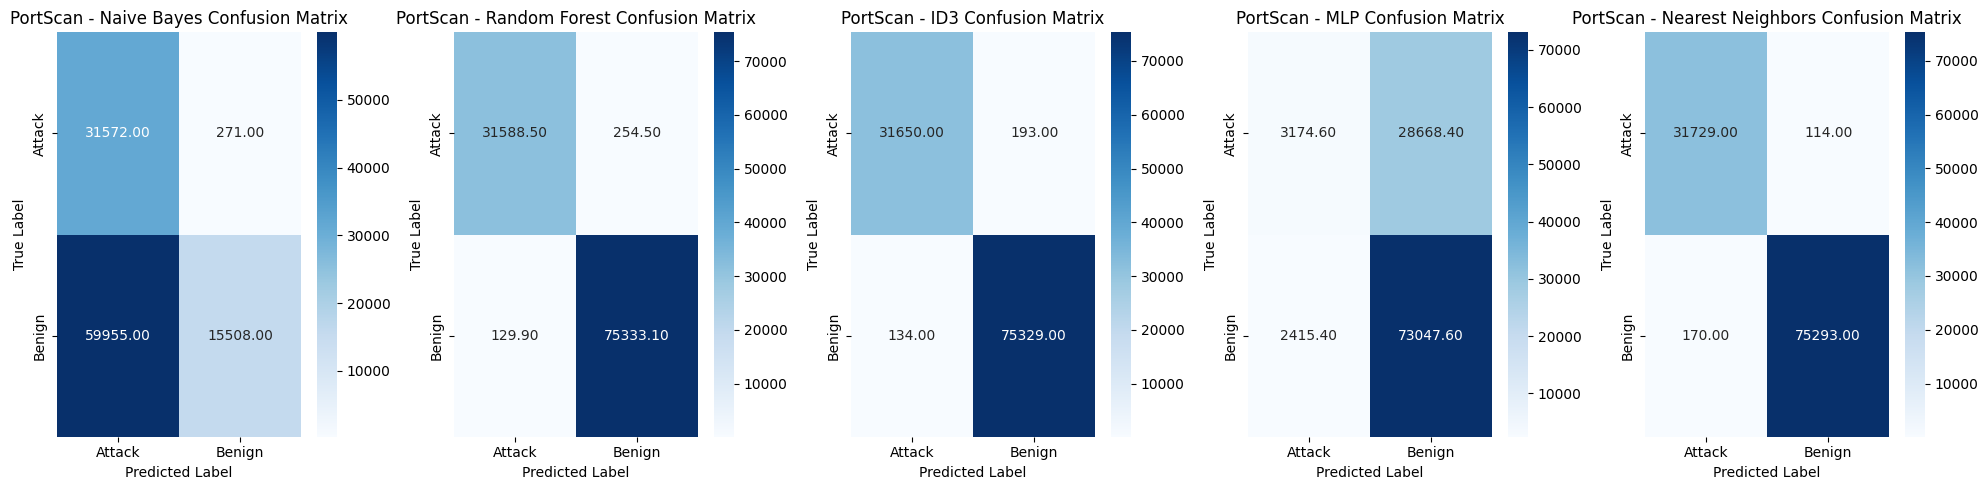

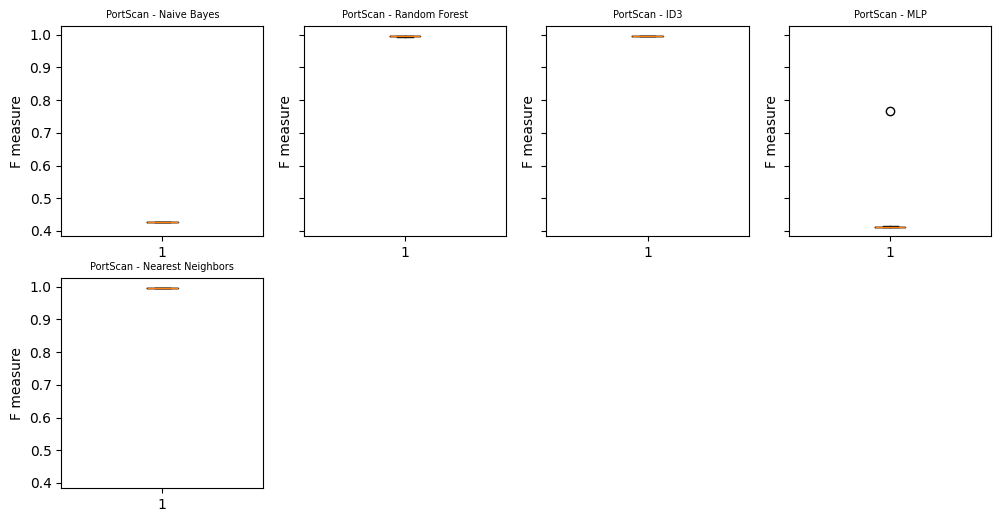


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.4             0.67            0.57            0.38            0.0173         
SSH-Patator       Random Forest      0.96            0.95            0.97            0.96            0.0733         
SSH-Patator       ID3                0.96            0.94            0.97            0.95            0.0354         
SSH-Patator       MLP                0.88            0.86            0.86            0.85            1.0773         
SSH-Patator       Nearest Neighbors  0.95            0.94            0.95            0.95            0.3699         


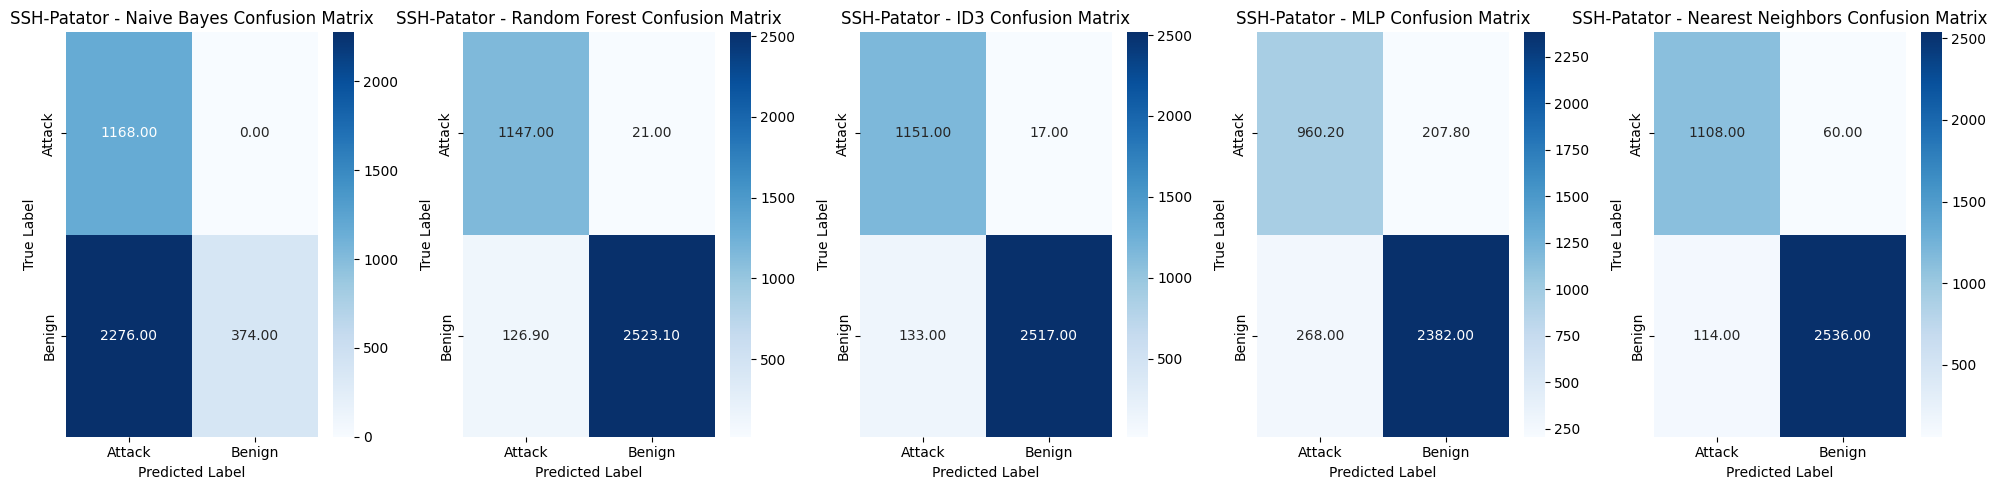

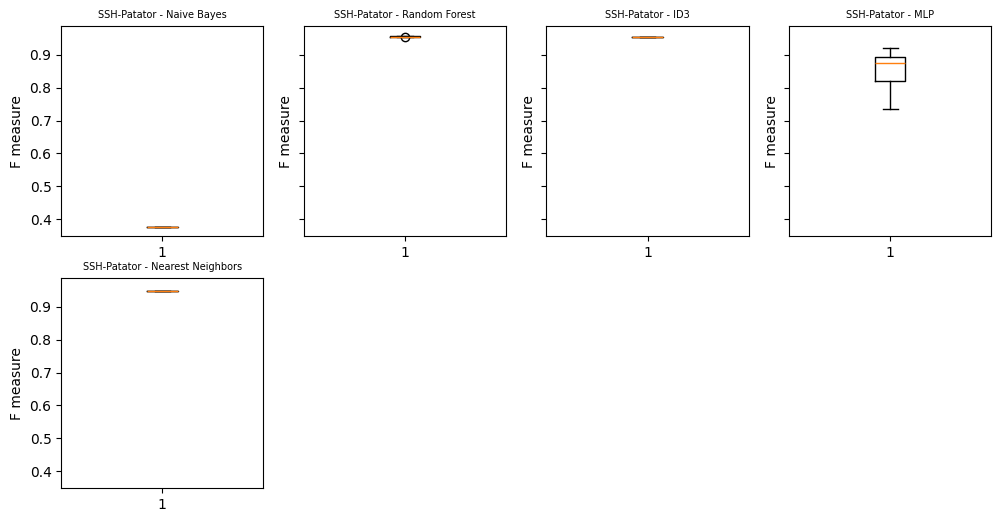


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        0.71            0.76            0.79            0.71            0.0103         
Web Attack        Random Forest      0.96            0.97            0.94            0.95            0.0384         
Web Attack        ID3                0.95            0.95            0.95            0.95            0.0175         
Web Attack        MLP                0.7             0.61            0.61            0.56            0.4062         
Web Attack        Nearest Neighbors  0.94            0.92            0.93            0.93            0.1195         


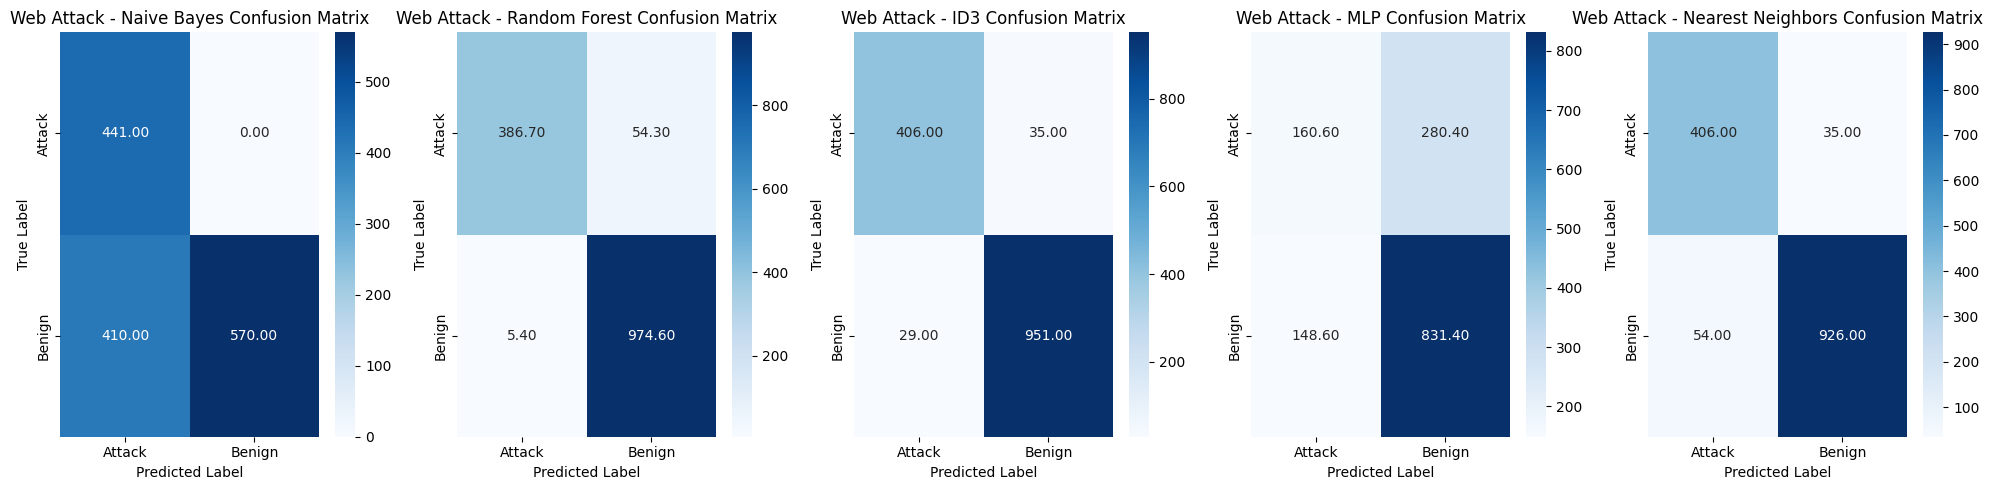

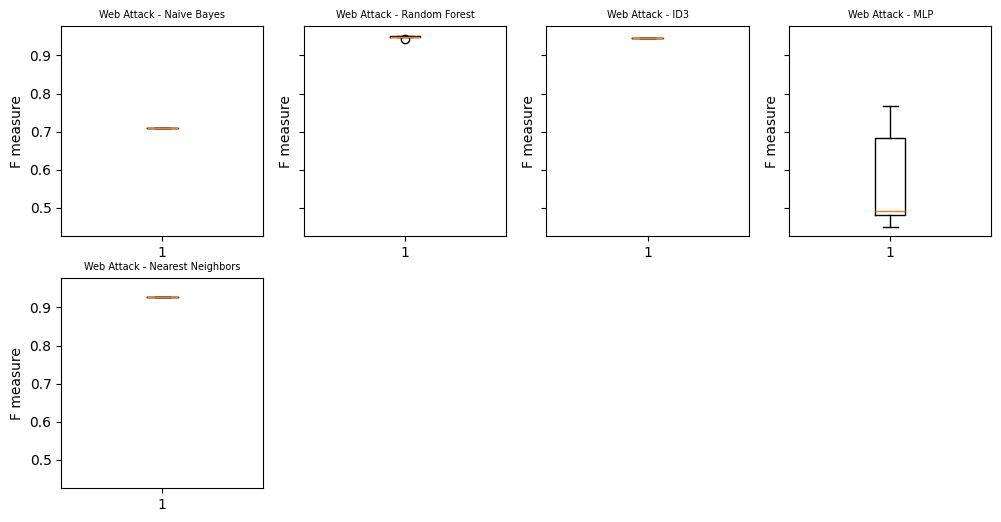


------------------------------------------------------------------------------------------------------


görev tamamlandı!
Toplam işlem süresi: =  107.72054163217544 dakika


In [ ]:
## "all_data.csv" dosyası programın çalışması için gereklidir.
## "all_data.csv" dosyası programla aynı dizinde bulunmalıdır.

## bu programın amacı, makine öğrenimi algoritmalarını veri kümesine uygulamak ve algoritmaların performansını gözlemlemektir.
## kullanılan algoritmalar şunlardır: Naive Bayes, Random Forest, ID3, MLP, Nearest Neighbors
## Program çıktısı verilerini gösterirken şunları içerir: dosya adı, makine öğrenimi algoritması adı, accuracy(doğruluk), Precision(Hassasiyet), Recall(Geri Çağırma), F1-score(F1 puanı), Zaman
## program, sonuçları yazdıran bir CSV dosyası ve grafik içeren bir klasör oluşturacaktır.

## hesaplama ve grafikleme için kullanılan bazı kod parçaları aşağıdaki siteden alınmıştır.
##  http://scikit-learn.org

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

result="./results/results_1.csv" # sonuçların kaydedildiği bir CSV dosyası adlandırılır.
csv_files=os.listdir("attacks")# CSV dosya adları: # attacks klasöründeki dosyaların adları alınır ve bir listeye atanır (csv_files).
path=".\\attacks\\"
repetition=10


def folder(f_name): # bu işlev, program dizininde "results" ve "result_graph_1" adlı bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Klasör oluşturulamadı!")

folder_name="./results/"
folder(folder_name)
folder_name="./results/result_graph_1/"
folder(folder_name)


# Kullanılacak makine öğrenimi algoritmaları bir sözlükte (ml_list) tanımlanmıştır.
ml_list={
    "Naive Bayes":GaussianNB(),
    "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
    "MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
    "Nearest Neighbors":KNeighborsClassifier(3)
}


# her saldırı türü için kullanılacak özellikler bir sözlükte (özellikler) tanımlanır.
# dosya tarafından oluşturulan özelliklerin ilk 4'ü "4.1-saldıri_dosyalari_icin_ozellik_secimi" burada kullanılıyor.
features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
"DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
"DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
"DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
"DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
"DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
"FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
"Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
"Infiltration":["Fwd Packet Length Max","Fwd Packet Length Mean","Flow Duration","Total Length of Fwd Packets","Label"],
"PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
"SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
"Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"]}

seconds=time.time()# tüm işlem süreleri için zaman damgası



with open(result, "w", newline="",encoding="utf-8") as f:# elde edilen sonuçları kaydetmek için bir CSV dosyası oluşturulur.
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])




for j in csv_files: # bu döngü, dosya adlarını içeren listede çalışır.Tüm saldırı dosyaları için işlemler tekrarlanır
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    a=[]
    
    try:
        feature_list = list(features[j[0:-4]])
        df = pd.read_csv(path + j, usecols=feature_list)  # bir saldırı dosyasını oku.
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı: {e}")
        continue
    except Exception as e:
        print(f"Diğer hata: {e}")
        continue
    
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: # makine öğrenimi algoritmasında kullanılmak üzere normal etiketi "1" ve saldırı etiketini "0" olarak değiştirir
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    
    y = df["Label"] # bu bölüm etiketi ve verileri Label=y Data=X olarak iki ayrı parçaya ayırır 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    confusion_matrices = {}  # Tüm algoritmaların karmaşıklık matrislerini saklamak için bir sözlük oluştur.
    
    for ii in ml_list: # bu döngü, makine öğrenimi algoritması adlarını içeren listede çalışır. İşlemler tüm 7 algoritması için tekrarlanır
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        cm_all = np.zeros((2, 2))  # Karmaşıklık matrisinin toplanması için bir matris oluşturulur.
        
        for i in range(repetition): # Bu döngü, çapraz doğrulama ve makine öğrenimi algoritmasının 10 kez tekrarlanmasını sağlar
            second=time.time()# işlem süresi için zaman damgası

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y, #  veri (X) ve etiketler (y) makine öğrenme algoritmasına gönderilmek üzere 2 parçaya bölünür (%80 eğitim, %20 test).
                test_size = 0.20, random_state = repetition)# Bu nedenle, toplamda 4 parça vardır: eğitim verisi (X_train), eğitim etiketi (y_train), test verisi (X_test) ve test etiketi (y_test)

            # bu bölümde makine öğrenimi algoritması uygulanmaktadır
            clf = ml_list[ii]# ml_list sözlüğünden algoritma seçin                                                                         
            clf.fit(X_train, y_train)
            predict =clf.predict(X_test)
        
            # "classification report" oluşturur ve precision, f-measure ve recall değerlerini atar.  
                  
            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')
            
            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )
            
             # Karmaşıklık matrisini hesapla
            cm = confusion_matrix(y_test, predict)
            cm_all += cm  # Tüm tekrarlar boyunca matrisi topla
        
        cm_all /= repetition  # Karmaşıklık matrisinin ortalamasını al

        confusion_matrices[ii] = cm_all  # Karmaşıklık matrisini sözlüğe ekle

        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))# on tekrarın sonucu ekrana yazdırılır.

        with open(result, "a", newline="",encoding="utf-8") as f: # bulunan tüm değerler açılan dosyaya kaydedilir.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])# dosya adı, algoritma adı, hassasiyet(precision), geri çağırma(recall ) ve f ölçüsü(f-measure) CSV dosyasına yazılır
        a.append(f1)
    
    # Karmaşıklık matrislerinin grafiğini çiz
    fig, axs = plt.subplots(1, len(confusion_matrices), figsize=(20, 5))
    for idx, (key, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Attack", "Benign"], yticklabels=["Attack", "Benign"], ax=axs[idx])
        axs[idx].set_title(f'{j[0:-4]} - {key} Confusion Matrix')
        axs[idx].set_ylabel('True Label')
        axs[idx].set_xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'./results/confusion_matrix_{j[0:-4]}.pdf', bbox_inches='tight', format='pdf')
    plt.show()
    
    # Bu bölümde, Makine öğrenimi algoritmalarının sonuçları için Box grafikler oluşturulur ve result_graph klasörüne kaydedilir.

    ml=["Naive Bayes", "Random Forest", "ID3", "MLP", "Nearest Neighbors"]
    temp=0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
            if temp < len(ml):  # 'ml' listesindeki tüm elemanlar için işlem yap
                axes[c, b].boxplot(a[temp] )
                axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
                axes[c, b].set_ylabel(("F measure"))
                temp+=1
            else:
                axes[c, b].axis('off')  # Kalan eksenleri kapat
    
    # Grafiği kaydet ve göster
    plt.savefig(folder_name+j[0:-4]+".pdf", bbox_inches='tight', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("görev tamamlandı!")
print("Toplam işlem süresi: = ", (time.time() - seconds) / 60, "dakika")

05.2-machine_learning_implementation_with_18_feature

Dosya             ML algoritması     Doğruluk        Hassasiyet      Duyarlılık      F1-skoru        Zaman          
all_data          Naive Bayes        0.78            0.65            0.66            0.65            3.3957         


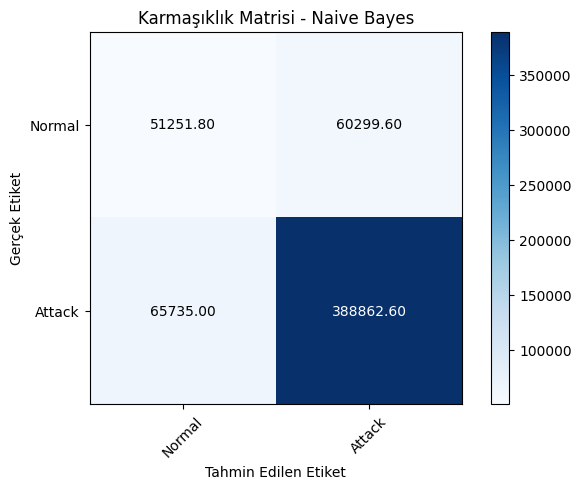

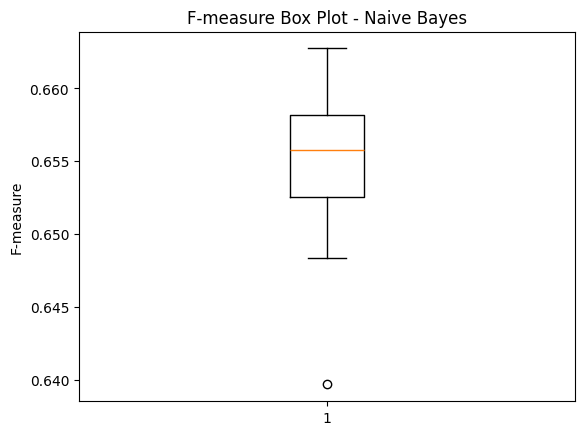

all_data          Random Forest      0.95            0.97            0.87            0.91            17.7408        


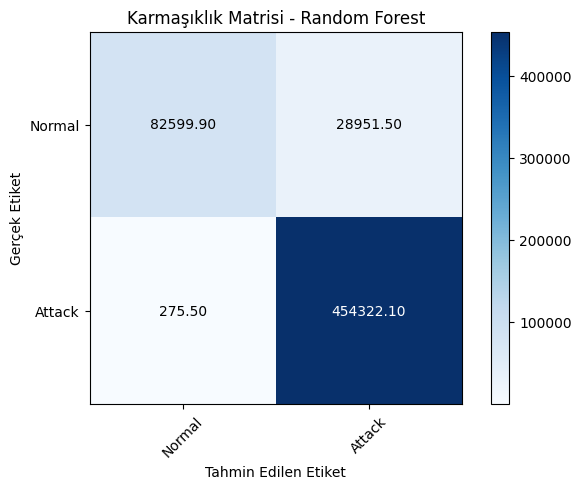

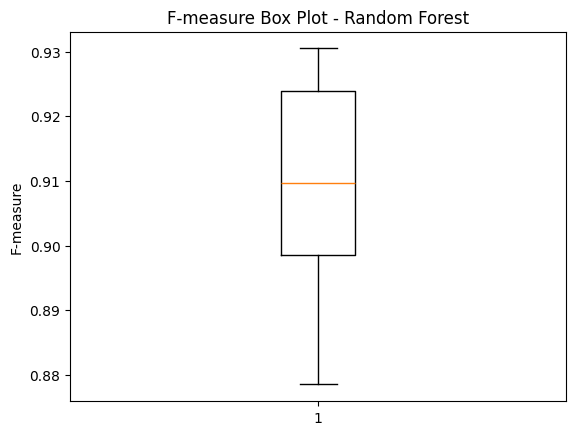

all_data          ID3                0.96            0.97            0.91            0.94            23.1597        


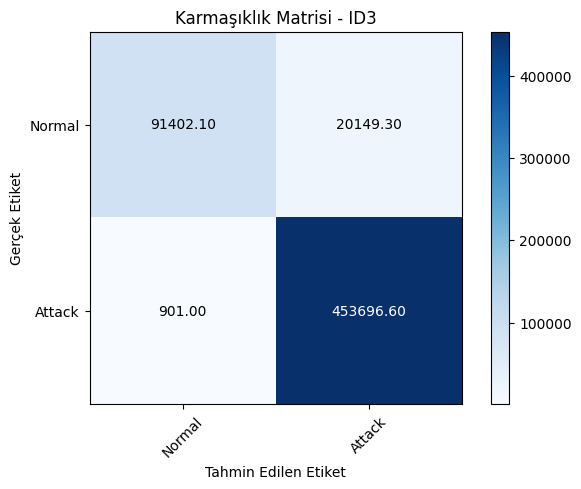

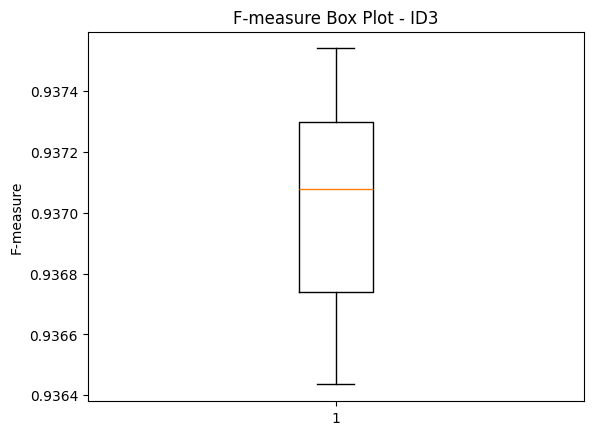

all_data          MLP                0.82            0.77            0.55            0.54            291.776        


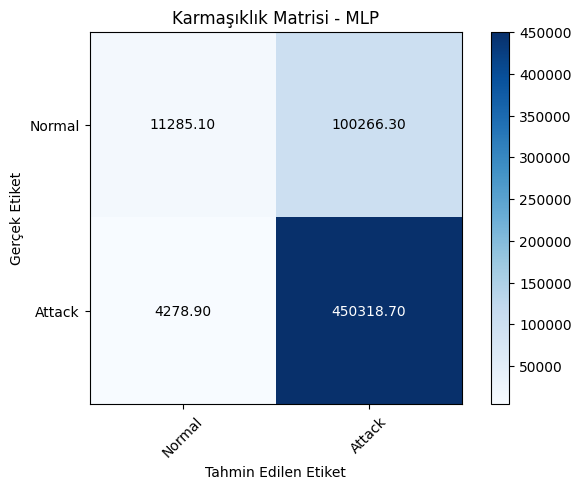

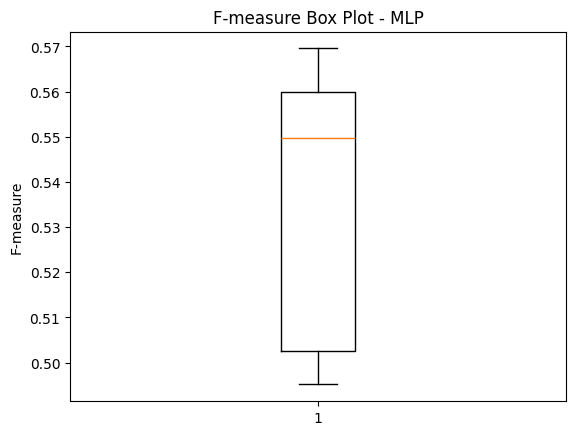

all_data          Nearest Neighbors  0.98            0.97            0.97            0.97            3342.4021      


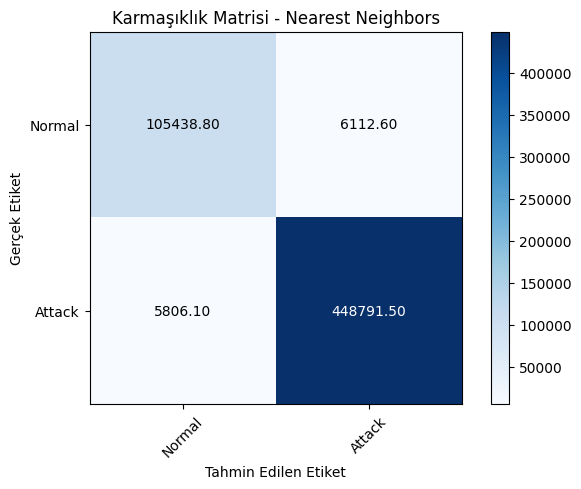

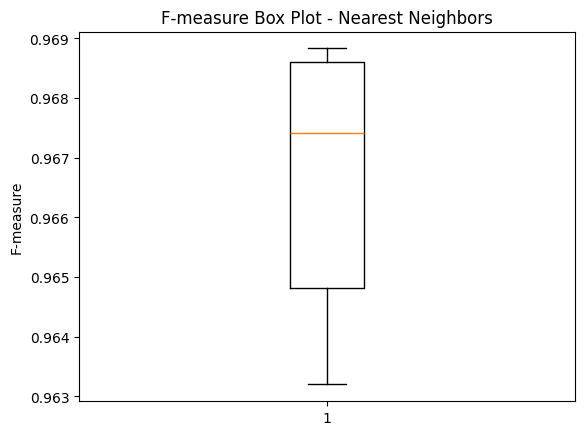

Görev tamamlandı!
Toplam işlem süresi: = 36808.56168293953 saniye


In [1]:
##  programın çalışması için "all_data.csv" dosyası gereklidir.
##  "all_data.csv" dosyası programla aynı dizinde bulunmalıdır.

##  bu programın amacı, makine öğrenimi algoritmalarını veri kümesine uygulamak ve algoritmaların performansını gözlemlemektir.
##  kullanılan algoritmalar şunlardır:Naive Bayes, Random Forest, ID3, MLP, Nearest Neighbors
##  Program çıktısı verileri şunları içerir: dosya adı, makine öğrenmesi algoritmasının ismi, accuracy(doğruluk), Precision(Hassasiyet), Recall(Geri Çağırma), F1-score, Zaman
##  Program, sonuçları yazdıran bir CSV dosyası ve grafik içeren bir klasör oluşturacaktır.

##  hesaplama ve grafikleme için kullanılan bazı kod parçaları aşağıdaki siteden alınmıştır.
##  http://scikit-learn.org

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
            
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

# Sonuçların kaydedileceği CSV dosyası
result = "./results/results_2.csv"

# Kullanılacak CSV dosyaları
csv_files = ["all_data.csv"]

# CSV dosyalarının bulunduğu dizin (eğer aynı dizindeyse boş bırakabilirsiniz)
path = ""

# Tekrar sayısı
repetition = 10

# Sonuçları kaydetmek için klasör oluşturma fonksiyonu
def create_folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

# Sonuçların kaydedileceği ana klasör ve grafiklerin kaydedileceği klasörler oluşturuluyor
result_folder = "./results/"
create_folder(result_folder)
graph_folder = "./results/result_graph_2/"
create_folder(graph_folder)

# Kullanılacak ML algoritmaları ve isimleri
ml_algorithms = {
    "Naive Bayes":GaussianNB(),
    "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
    "MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
    "Nearest Neighbors":KNeighborsClassifier(3)
}

# Kullanılacak özellikler (features)
features = {
    "all_data": [
        "Bwd Packet Length Max", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s",
        "Flow Duration", "Flow IAT Max", "Flow IAT Mean", "Flow IAT Min", "Flow IAT Std", "Fwd IAT Total",
        "Fwd Packet Length Max", "Fwd Packet Length Mean", "Fwd Packet Length Min", "Fwd Packet Length Std",
        "Total Backward Packets", "Total Fwd Packets", "Total Length of Bwd Packets", "Total Length of Fwd Packets",
        "Label"
    ]
}

# Başlangıç zamanı
start_time = time.time()

# CSV dosyaları üzerinde işlemler yapılıyor
for csv_file in csv_files:
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("Dosya", "ML algoritması", "Doğruluk", "Hassasiyet", "Duyarlılık", "F1-skoru", "Zaman"))
    feature_list = features[csv_file[0:-4]]
    df = pd.read_csv(path + csv_file, usecols=feature_list)
    df = df.fillna(0)
    df["Label"] = df["Label"].apply(lambda x: 1 if x == "BENIGN" else 0)

    y = df["Label"]
    X = df.drop(columns=["Label"])
    feature_list.remove('Label')

    for alg_name, alg in ml_algorithms.items():
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        cm_sum = np.zeros((2, 2))  # Toplam karmaşıklık matrisi

        for i in range(repetition):
            second = time.time()

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

            clf = alg
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')
            cm = confusion_matrix(y_test, predict)
            cm_sum += cm

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        avg_cm = cm_sum / repetition
        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (csv_file[0:-4], alg_name, str(round(np.mean(accuracy), 2)),
                                                              str(round(np.mean(precision), 2)), str(round(np.mean(recall), 2)),
                                                              str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        # Sonuçları CSV dosyasına yaz
        with open(result, "a", newline="", encoding="utf-8") as f:
            wrt = csv.writer(f)
            for i in range(len(t_time)):
                wrt.writerow([csv_file[0:-4], alg_name, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])

        # Karmaşıklık matrisini çiz ve göster
        plt.figure()
        plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Karmaşıklık Matrisi - " + alg_name)
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ["Normal", "Attack"], rotation=45)
        plt.yticks(tick_marks, ["Normal", "Attack"])
        plt.tight_layout()
        plt.ylabel('Gerçek Etiket')
        plt.xlabel('Tahmin Edilen Etiket')

        # Matrisin içine sayıları yazdır
        thresh = avg_cm.max() / 2.0
        for i in range(avg_cm.shape[0]):
            for j in range(avg_cm.shape[1]):
                plt.text(j, i, format(avg_cm[i, j], '.2f'),
                         ha="center", va="center",
                         color="white" if avg_cm[i, j] > thresh else "black")

        plt.savefig(graph_folder + csv_file[0:-4] + "_" + alg_name + "_karmaşıklık_matrisi.pdf", bbox_inches='tight', format='pdf')
        plt.show()

        # F-measure box plot grafikleri oluştur
        plt.figure()
        plt.boxplot(f1)
        plt.title("F-measure Box Plot - " + alg_name)
        plt.ylabel('F-measure')
        plt.savefig(graph_folder + csv_file[                0:-4] + "_" + alg_name + "_f1_boxplot.pdf", bbox_inches='tight', format='pdf')
        plt.show()

print("Görev tamamlandı!")
print("Toplam işlem süresi: =", time.time() - start_time, "saniye")


05_3_machine_learning_implementation_with_7_feature

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.81            0.69            0.65            0.66            1.8864         


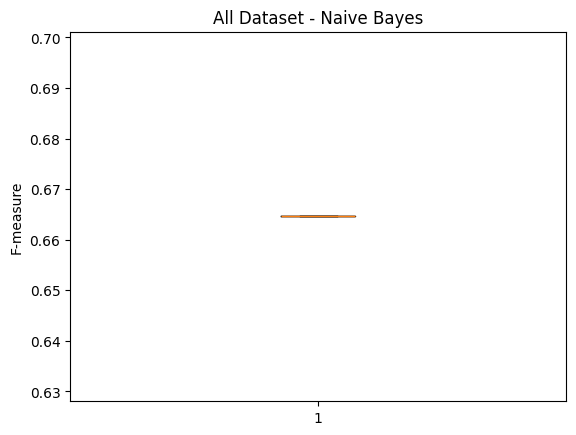

all_data          Random Forest      0.92            0.96            0.81            0.86            16.8036        


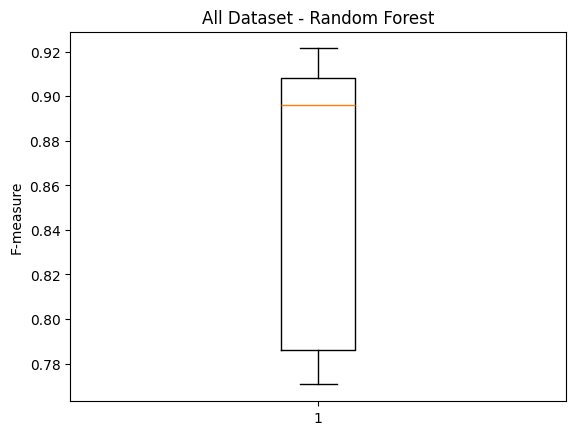

all_data          ID3                0.96            0.97            0.9             0.93            9.7859         


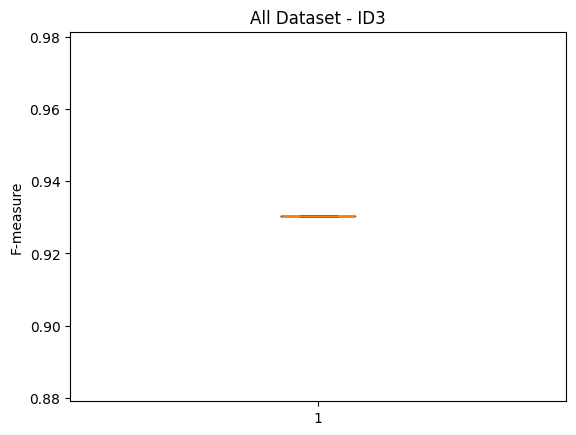

all_data          MLP                0.82            0.8             0.57            0.58            139.6691       


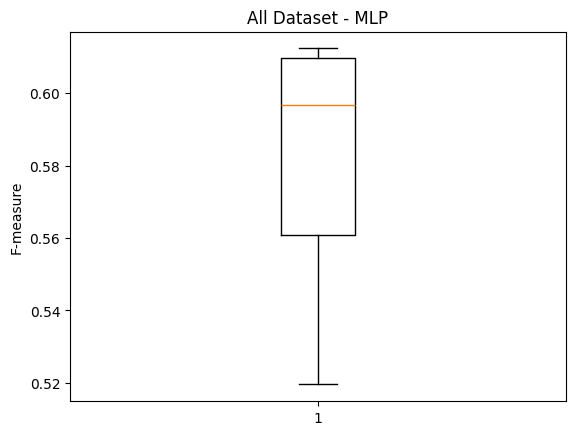

all_data          Nearest Neighbors  0.98            0.96            0.97            0.97            194.2323       


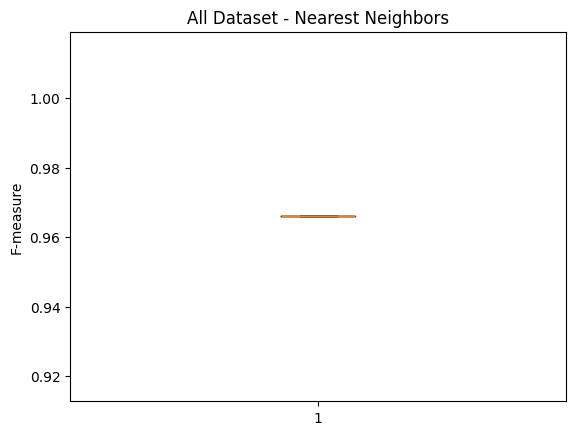

Görev tamamlandı!
Toplam işlem süresi: =  3636.0122015476227 saniye


In [1]:
##  "all_data.csv" file is required for the operation of the program.
##  "all_data.csv" file must be located in the same directory as the program.

##  the purpose of this program is to apply machine learning algorithms to the dataset and observe the performance of algorithms.
##  the algorithms used are:Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest Neighbors
##  As the program display output data include: file name, machine learning algorithm name, accuracy,Precision, Recall, F1-score,Time
##  the program will create a CSV file that prints the results and a folder containing graphics.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org

from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import math
import warnings
warnings.filterwarnings("ignore")

result = "./results/results_3.csv"  # Sonuçların kaydedileceği CSV dosyasının adı.
csv_files = ["all_data.csv"]  # CSV dosyalarının isimleri: veri seti dosyalarının isimleri (csv_files).
path = ""
repetition = 10

def folder(f_name):  # Bu fonksiyon program dizininde "results" ve "result_graph_1" adında klasörler oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_3/"
folder(folder_name)

# Kullanılacak makine öğrenmesi algoritmaları bir sözlükte tanımlanır (ml_list).
ml_list = {
    "Naive Bayes": GaussianNB(),
    "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500),
    "Nearest Neighbors":KNeighborsClassifier(3)
}

# İçe aktarılacak tüm sütunların listesi
# "04_2_feature_selection_for_attack_files.py" dosyası tarafından seçilen en yüksek öneme sahip 7 özellik burada kullanılır. (+ Etiket Özelliği)
features = {"all_data": ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
                         "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total", "Label"]}

seconds = time.time()  # İşlem süresi için zaman damgası

with open(result, "w", newline="", encoding="utf-8") as f:  # Elde edilen sonuçların kaydedileceği bir CSV dosyası oluşturulur.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # Bu döngü dosya isimlerini içeren listede çalışır. İşlemler tüm saldırı dosyaları için tekrarlanır.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # Çıktı başlığını yazdırır.
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols=feature_list)  # Bir saldırı dosyasını okur.
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]:  # Makine öğrenmesi algoritmasında kullanmak üzere normal etiketi "1" ve saldırı etiketini "0" olarak değiştirir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # Bu bölümde etiket ve veriler iki ayrı parçaya ayrılır, Etiket=y Veri=X
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list:  # Bu döngü makine öğrenmesi algoritma isimlerini içeren listede çalışır. İşlemler 3 algoritma için tekrarlanır.
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition):  # Bu döngü çapraz doğrulama ve makine öğrenmesi algoritmasının 10 kez tekrarlanmasını sağlar.
            second = time.time()  # İşlem süresi için zaman damgası.

            # Çapraz doğrulama
            X_train, X_test, y_train, y_test = train_test_split(X, y,  # Veri (X) ve etiketler (y) makine öğrenmesi algoritmasına gönderilmek üzere 2 parçaya ayrılır (yüzde 80 eğitim, yüzde 20 test).
                                                                test_size=0.20, random_state= repetition)  # Toplamda 4 parça vardır: eğitim verisi(X_train), eğitim etiketi(y_train), test verisi(X_test) ve test etiketi(y_test).

            # Makine öğrenmesi algoritması bu bölümde uygulanır.
            clf = ml_list[ii]  # ml_list sözlüğünden algoritma seçilir.
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # "classification report" oluşturur ve precision, f-measure ve recall değerlerini atar.
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
            j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
            str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))  # On tekrarlamanın sonucu ekrana yazdırılır.

        with open(result, "a", newline="", encoding="utf-8") as f:  # Bulunan tüm değerler açılan dosyaya kaydedilir.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # Dosya adı, algoritma adı, precision, recall ve f-measure CSV dosyasına yazılır.

        # Bu bölümde makine öğrenmesi algoritmalarının sonuçları için Box grafikler oluşturulur ve feature_graph klasörüne kaydedilir.
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()  # Grafiklerin eşzamanlı olarak görülmesini isterseniz # işaretini kaldırabilirsiniz.

print("Görev tamamlandı!")
print("Toplam işlem süresi: = ", time.time() - seconds, "saniye")

05_4_machine_learning_implementation_final

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.85            0.77            0.7             0.73            1.6768         


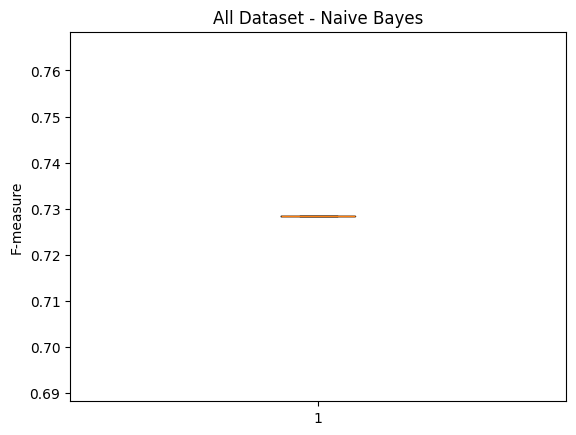

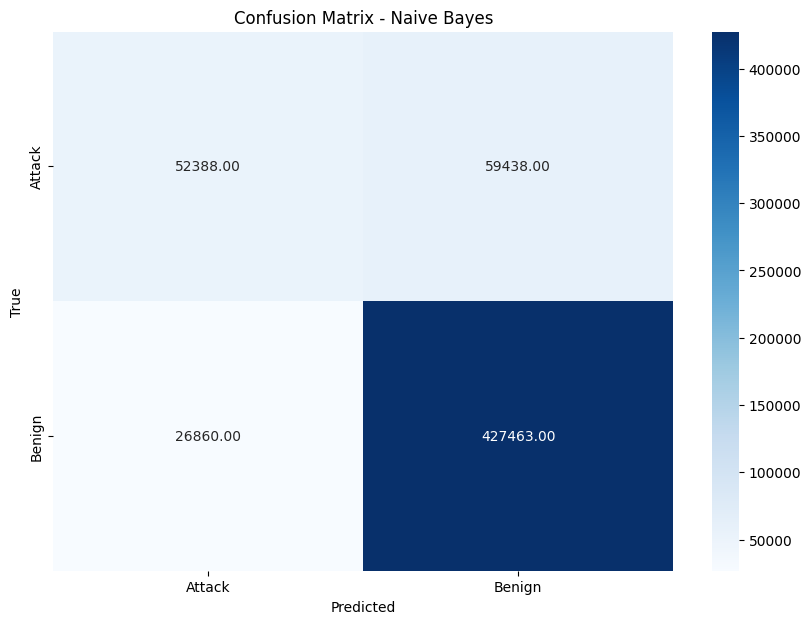

all_data          Random Forest      0.94            0.96            0.85            0.89            17.4273        


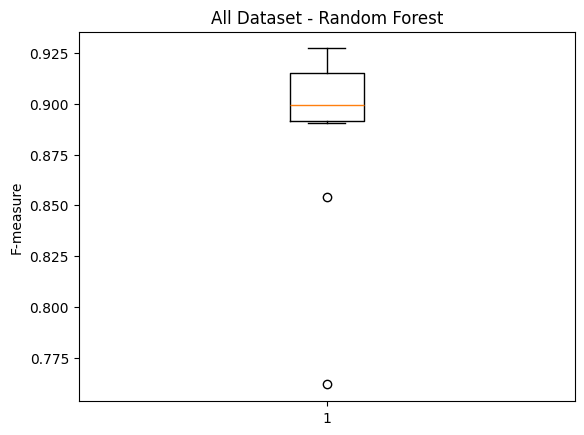

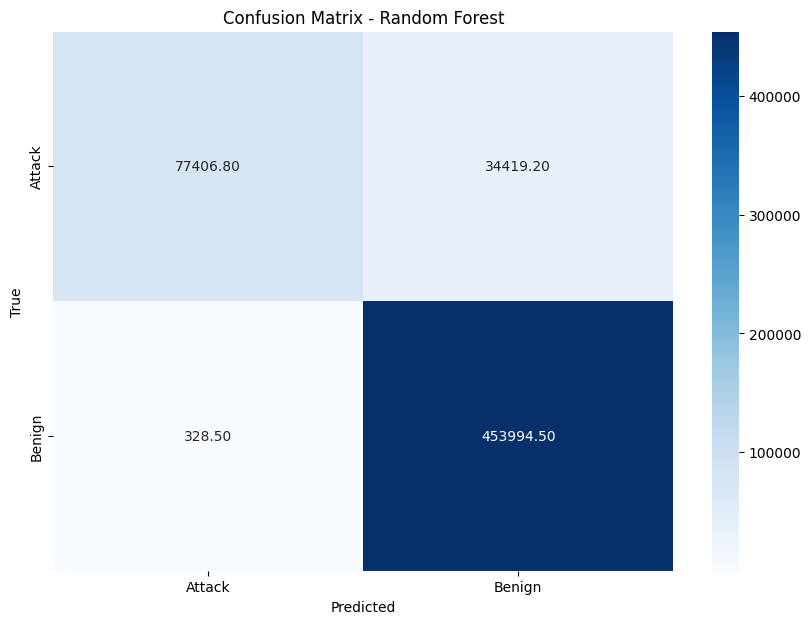

all_data          ID3                0.96            0.97            0.9             0.93            10.1382        


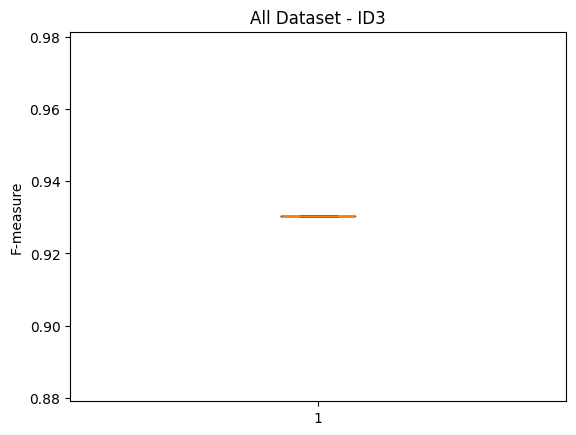

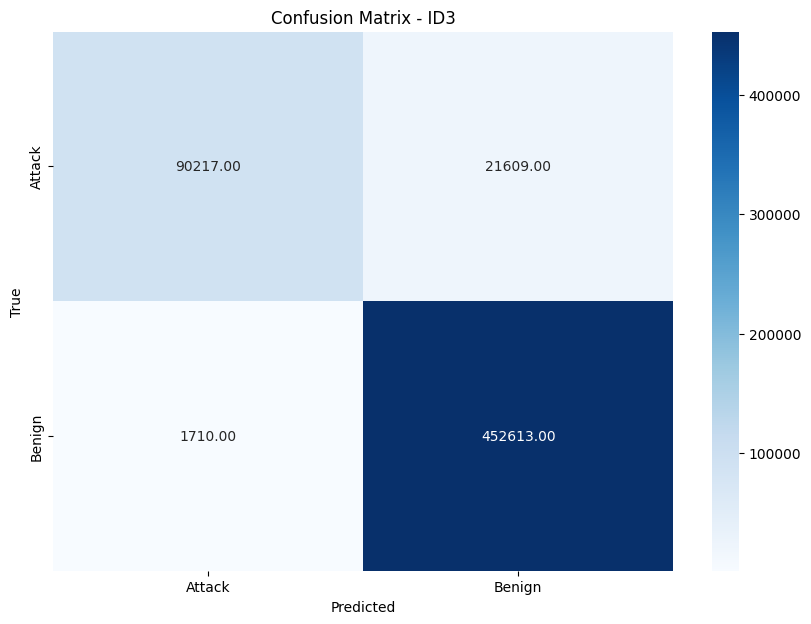

all_data          MLP                0.86            0.85            0.71            0.72            194.7708       


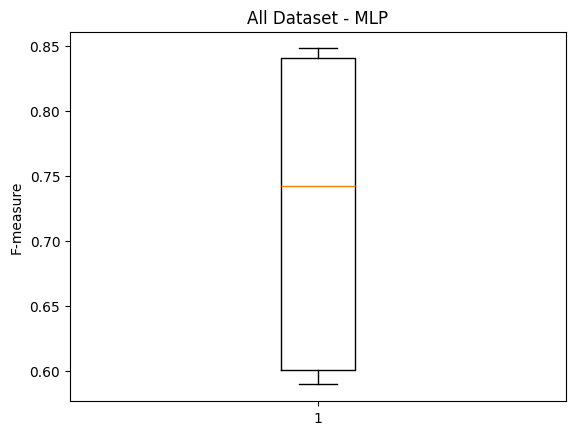

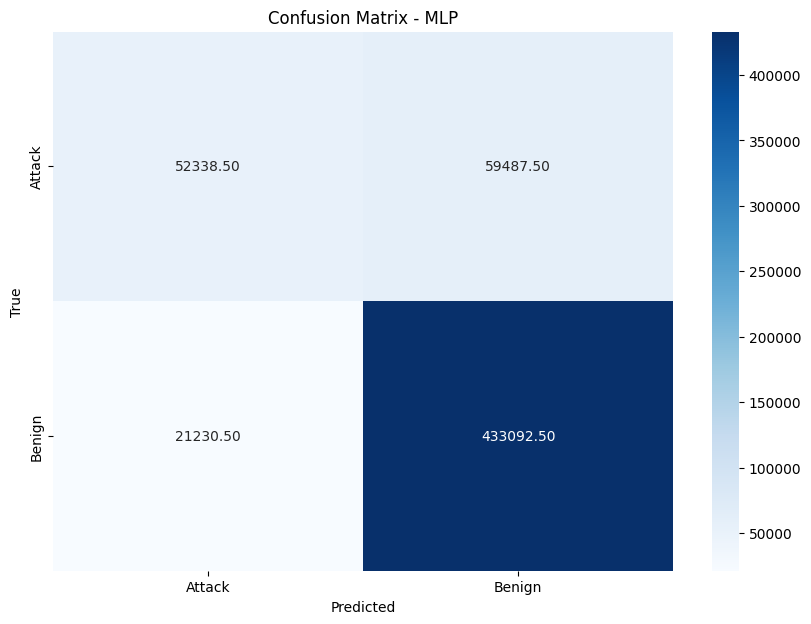

all_data          Nearest Neighbors  0.98            0.96            0.97            0.97            649.3246       


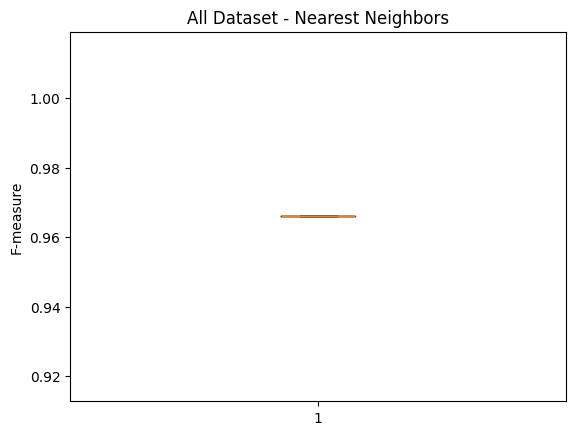

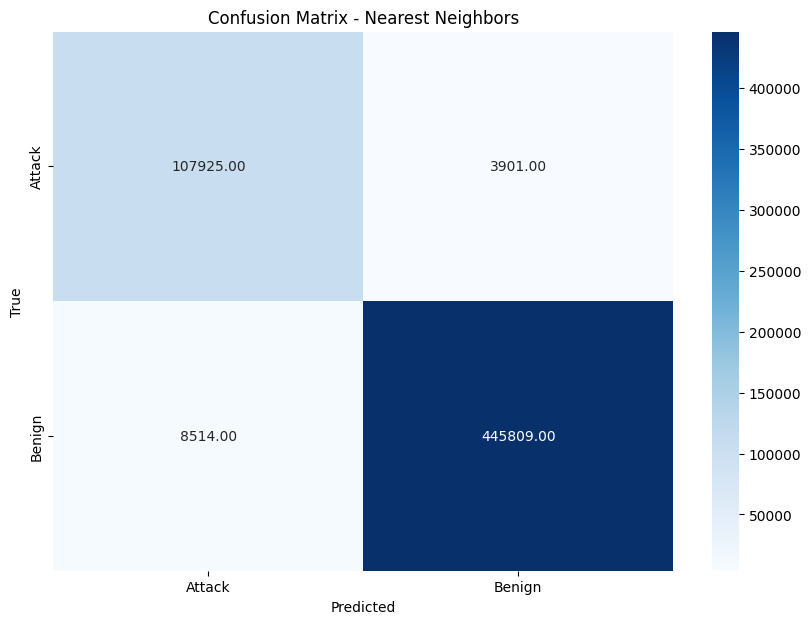

Görev tamamlandı!
Toplam işlem süresi: =  8754.102476119995 saniye


In [2]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

import numpy as np
import seaborn as sns
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

def folder(f_name):  # Bu fonksiyon program dizininde "feaure_graph" adında bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

result = "./results/results_Final.csv"  # Sonuçların kaydedildiği bir CSV dosyası adı.
csv_files = ["all_data.csv"]  # CSV dosyalarının isimleri: veri seti dosyalarının isimleri (csv_files).
path = ""
repetition = 10

def folder(f_name):  # Bu fonksiyon program dizininde "results" ve "result_graph_1" adında klasörler oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_Final/"
folder(folder_name)

# "04_2_feature_selection_for_attack_files.py" dosyası tarafından seçilen 20 özellik burada kullanılır. (+ Etiket Özelliği)
usecols = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std", "Flow IAT Std",
           "Flow IAT Min", "Fwd IAT Total", "Flow Duration", "Bwd Packet Length Max", "Flow IAT Max", "Flow IAT Mean", "Total Length of Bwd Packets",
           "Fwd Packet Length Min", "Bwd Packet Length Mean", "Flow Packets/s", "Fwd Packet Length Mean", "Total Backward Packets", "Total Fwd Packets",
           "Fwd Packet Length Max", "Bwd Packet Length Min", 'Label']

# Kullanılacak makine öğrenmesi algoritmaları bir sözlükte tanımlanır (ml_list).
ml_list = {
    "Naive Bayes": GaussianNB(),
    "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500),
    "Nearest Neighbors":KNeighborsClassifier(3)
}

# Bu algoritmalar için kullanılacak özellikler bir listede tanımlanır.
others = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
          "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total"]

# Bu bölümde makine öğrenmesi yöntemleri için farklı özellik setleri aşağıdaki gibi tanımlanır:
# "Naive Bayes" ve "MLP" için her yöntemin farklı bir özellik listesi vardır.
# "ID3" ise "others" listesindeki özellikleri kullanır.
algorithms_features = {
    "Naive Bayes": ['Bwd Packet Length Std', 'Total Length of Fwd Packets', 'Flow IAT Min', 'Fwd Packet Length Min', 'Flow Packets/s', 'Fwd Packet Length Mean'],
    "MLP": ['Bwd Packet Length Std', 'Flow Bytes/s', 'Total Length of Fwd Packets', 'Fwd Packet Length Std',
            'Flow IAT Min', 'Bwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Mean',
            'Total Backward Packets', 'Total Fwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Min'],
    "Random Forest":others,
    "ID3" :others,
    "Nearest Neighbors":others
}

seconds = time.time()  # Tüm işlem süresi için zaman damgası

with open(result, "w", newline="", encoding="utf-8") as f:  # Elde edilen sonuçların kaydedildiği bir CSV dosyası oluşturulur.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # Bu döngü dosya isimlerini içeren listede çalışır. İşlemler tüm saldırı dosyaları için tekrarlanır.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # Çıktı başlığını yazdırır.
    feature_list = usecols
    df = pd.read_csv(path + j, usecols=feature_list)  # Bir saldırı dosyasını okur.
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]:  # Makine öğrenmesi algoritmasında kullanmak üzere normal etiketi "1" ve saldırı etiketini "0" olarak değiştirir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # Bu bölümde etiket ve veriler iki ayrı parçaya ayrılır, Etiket=y Veri=X
    del df["Label"]
    feature_list.remove('Label')
    for ii in ml_list:  # Bu döngü makine öğrenmesi algoritma isimlerini içeren listede çalışır. İşlemler tüm algoritmalar için tekrarlanır.
        X = df[algorithms_features[ii]]
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        conf_matrices = []  # Confusion matrix'leri saklamak için liste
        for i in range(repetition):  # Bu döngü çapraz doğrulama ve makine öğrenmesi algoritmasının 10 kez tekrarlanmasını sağlar.
            second = time.time()  # İşlem süresi için zaman damgası

            # Çapraz doğrulama
            X_train, X_test, y_train, y_test = train_test_split(X, y,  # Veri (X) ve etiketler (y) makine öğrenmesi algoritmasına gönderilmek üzere 2 parçaya ayrılır.
                                                                test_size=0.20, random_state=repetition)  # Toplamda 4 parça vardır: eğitim verisi(X_train), eğitim etiketi(y_train), test verisi(X_test) ve test etiketi(y_test).

            # Makine öğrenmesi algoritması bu bölümde uygulanır
            clf = ml_list[ii]  # ml_list sözlüğünden algoritma seçilir.
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # "classification report" oluşturur ve precision, f-measure ve recall değerlerini atar.
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

            # Confusion matrix oluşturma
            conf_matrices.append(confusion_matrix(y_test, predict))

        # Ortalama confusion matrix hesaplama
        mean_conf_matrix = np.mean(conf_matrices, axis=0)

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
                                                             str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))  # On tekrarlamanın ortalama sonucu ekrana yazdırılır.

        with open(result, "a", newline="", encoding="utf-8") as f:  # Bulunan tüm değerler açılan dosyaya kaydedilir.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # Dosya adı, algoritma adı, precision, recall ve f-measure CSV dosyasına yazılır.

        # Bu bölümde makine öğrenmesi algoritmalarının sonuçları için Box grafikler oluşturulur ve feaure_graph klasörüne kaydedilir.
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()  # Grafiklerin eşzamanlı olarak görülmesini isterseniz # işaretini kaldırabilirsiniz.

        # Confusion matrix görselleştirme ve kaydetme
        plt.figure(figsize=(10, 7))
        sns.heatmap(mean_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=["Attack", "Benign"], yticklabels=["Attack", "Benign"])
        plt.title("Confusion Matrix - " + str(ii))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(folder_name + j[0:-4] + str(ii) + "_confusion_matrix.pdf", bbox_inches='tight', format='pdf')
        plt.show()

print("Görev tamamlandı!")
print("Toplam işlem süresi: = ", time.time() - seconds, "saniye")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import pandas as pd
import warnings
import time

# İşlem süresi başlangıcı
seconds = time.time()

# İçe aktarılacak tüm sütunların listesi
features = ["Bwd Packet Length Std","Flow Bytes/s","Total Length of Fwd Packets","Fwd Packet Length Std",
            "Flow IAT Std","Flow IAT Min","Fwd IAT Total","Flow Duration","Bwd Packet Length Max","Flow IAT Max",
            "Flow IAT Mean","Total Length of Bwd Packets","Fwd Packet Length Min","Bwd Packet Length Mean",
            "Flow Packets/s","Fwd Packet Length Mean","Total Backward Packets","Total Fwd Packets","Fwd Packet Length Max",
            "Bwd Packet Length Min",'Label']

df = pd.read_csv('all_data.csv', usecols=features) # CSV okuma

print(f"{'Özellik Numarası':<20} {'Özellik':<20}") # çıktı başlığını yazdır
for i in range(len(features)-1):
    print(f"{i+1:<20} {features[i]:<20}") # özellikleri ve özellik numaralarını yazdır

print('\n\n\n')

# Etiketleri 1 (BENIGN) ve 0 (ATTACK) olarak yeniden kodlama
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'BENIGN' else 0)
y = df['Label'].astype(int).values # etiketler - y


# Kullanılacak makine öğrenme algoritmaları
ml_list = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3" : DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "MLP": MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500),
    "Nearest Neighbors": KNeighborsClassifier(3)
}

features.pop() # Label etiketi kaldırılır, artık gerek yok
print(f"{'ML algoritması':<20} {'Özellik Adı':<30} {'F1-score':<10} {'Accuracy':<10} {'Özellik Listesi':<20}") # çıktı başlığını yazdır

for model_name, clf in ml_list.items():
    my_list = []
    best_f1 = 0
    best_feature_list = []

    for feature in features:
        my_list.append(feature)
        X = df[my_list].values

        # Çapraz doğrulama
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

        # Model eğitimi ve tahmin
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Değerlendirme metrikleri
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = clf.score(X_test, y_test)
        feature_indices = [features.index(f) + 1 for f in my_list]

        if f1 >= best_f1:
            best_f1 = f1
            best_feature_list = my_list.copy()
            print(f"{model_name:<20} {feature:<30} {f1:<10.4f} {accuracy:<10.4f} {str(feature_indices):<20} {'------> Yeni özellik bulundu!!!':<20}")
        else:
            my_list.pop() # En son eklenen özelliği kaldır

        print(f"{model_name:<20} {feature:<30} {f1:<10.4f} {accuracy:<10.4f} {str(feature_indices):<20}")

    print(f"F1= {best_f1:<10.4f} {model_name:<20} En verimli özellik listesi= {best_feature_list}\n\n")

print("Görev tamamlandı!")
print("İşlem süresi: =", time.time() - seconds, "saniye")


Özellik Numarası     Özellik             
1                    Bwd Packet Length Std
2                    Flow Bytes/s        
3                    Total Length of Fwd Packets
4                    Fwd Packet Length Std
5                    Flow IAT Std        
6                    Flow IAT Min        
7                    Fwd IAT Total       
8                    Flow Duration       
9                    Bwd Packet Length Max
10                   Flow IAT Max        
11                   Flow IAT Mean       
12                   Total Length of Bwd Packets
13                   Fwd Packet Length Min
14                   Bwd Packet Length Mean
15                   Flow Packets/s      
16                   Fwd Packet Length Mean
17                   Total Backward Packets
18                   Total Fwd Packets   
19                   Fwd Packet Length Max
20                   Bwd Packet Length Min




ML algoritması       Özellik Adı                    F1-score   Accuracy   Özellik Listes